----------------------------------
   # Case Study:      Travel Package Purchase **Prediction**
----------------------------------

## Context: 
    
- A tourism company named "Visit with us" is currently offering 5 types of packages: Basic, Standard, Deluxe, Super Deluxe, King.
- "Visit with us" wants to expand the customer base by offering a new package named:"Wellness Tourism". 
-  Last year 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random.
- This year, "Visit with us" wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
- In this case study, we will build a model that will help the marketing department to identify the potential customer who is going to purchase the newly introduced travel package:"Wellness Tourism" .

## Probelm:

- Explore and visualize the dataset.
- Determine the distributions of the variables and how they relate to each other,
- Come up with a customer profile (characteristics of a customer) of the different packages
- Build a model to predict  which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

**Customer details**
- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

**Customer interaction data** 
- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Importing necessary libraries

In [2]:
import warnings
warnings.filterwarnings("ignore") # to avoid warnings
# Import the necessary packages 
import pandas as pd    
pd.set_option('display.float_format', lambda x: '%5f' % x) # To supress numerical display in scientific notations
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set(color_codes = True) 

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier 

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,  confusion_matrix
from sklearn.model_selection import GridSearchCV


 ## Loading the data

In [3]:
# Reading in the Dataset, here the data is in the second sheet of the Excel file( sheet_name is 0 indexed therefore
# sheet_name=1 refers to the second sheet)
dfTourismOriginal = pd.read_excel('Tourism.xlsx', sheet_name=1)
# Making a copy of data
dfTourism=dfTourismOriginal.copy()
# drop any duplicate observations if any exists.
dfTourism.drop_duplicates(inplace=True)
#Getting an overall information about the dataset
dfTourism.info()
#View 10 sample rows of the dataset
dfTourism.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
533,200533,0,40.000000,Company Invited,3,11.000000,Salaried,Male,2,4.000000,Standard,5.000000,Divorced,6.000000,1,5,0,1.000000,Senior Manager,25475.000000
2924,202924,1,31.000000,Company Invited,3,19.000000,Salaried,Male,4,5.000000,Basic,5.000000,Divorced,3.000000,0,5,1,1.000000,Executive,20711.000000
96,200096,0,24.000000,Self Enquiry,3,9.000000,Salaried,Female,2,nan,Deluxe,3.000000,Divorced,1.000000,0,4,1,0.000000,Manager,19999.000000
1092,201092,0,45.000000,Self Enquiry,1,34.000000,Large Business,Male,3,3.000000,Basic,3.000000,Married,5.000000,0,3,1,2.000000,Executive,17132.000000
835,200835,0,35.000000,Self Enquiry,2,nan,Large Business,Male,3,3.000000,Basic,3.000000,Single,2.000000,0,5,0,1.000000,Executive,nan
3499,203499,0,35.000000,Company Invited,1,22.000000,Small Business,Male,4,4.000000,Super Deluxe,5.000000,Married,nan,0,4,1,3.000000,AVP,35685.000000
1418,201418,0,38.000000,Company Invited,1,12.000000,Salaried,Male,3,4.000000,Deluxe,3.000000,Married,3.000000,0,4,1,1.000000,Manager,20321.000000
2741,202741,0,36.000000,Self Enquiry,3,23.000000,Small Business,Male,4,4.000000,Standard,4.000000,Divorced,2.000000,0,2,1,3.000000,Senior Manager,26698.000000
1432,201432,0,37.000000,Self Enquiry,1,16.000000,Salaried,Female,2,1.000000,Standard,3.000000,Married,2.000000,1,1,0,1.000000,Senior Manager,28744.000000
2754,202754,0,32.000000,Self Enquiry,2,9.000000,Salaried,Male,4,5.000000,Deluxe,5.000000,Divorced,5.000000,0,3,0,2.000000,Manager,25088.000000


**Observations**
- There are 4888 observations\rows and 20 columns,
- Dependent Variable\Target is ProdTaken.
- The column CustomerID will be dropped, we will use the index instead.
- Currently ProdTaken, CityTier, PreferredPropertyStar, Passport, OwnCar, and PitchSatisfactionScore are numerical variables, we need to transform them to categorical variables.
- TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, and Designation are of object type, we will transform them to categorical variables.
- The rest are numerical variables with types int64 or float64, we will keep the way they are now.
- Some variables have missing values, we need to impute these missing values.

## Exploring, Visualizing, and Preparing the Dataset

In [4]:
# Dropping the ID column
dfTourism.drop(['CustomerID'], axis=1, inplace=True)

### Converting some numerical variables to its correct categorical type

In [5]:
col_to_convert=['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport', 'OwnCar', 'PitchSatisfactionScore']
for col in col_to_convert:
    dfTourism[col] = dfTourism[col].astype('category')

### Converting  variables of type object to category type

In [6]:
col_to_convert=['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
for col in col_to_convert:
    dfTourism[col] = dfTourism[col].astype('category')

In [7]:
dfTourism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

**Observations**
- All the variables have the correct Data type

### Quick analysis of the attributes

In [8]:
dfTourism.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4888.000000,2.000000,0.000000,3968.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,4662.000000,NaN,NaN,NaN,37.622265,9.316387,18.000000,31.000000,36.000000,44.000000,61.000000
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.000000,3.000000,1.000000,3190.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,4637.000000,NaN,NaN,NaN,15.490835,8.519643,5.000000,9.000000,13.000000,20.000000,127.000000
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.000000,NaN,NaN,NaN,2.905074,0.724891,1.000000,2.000000,3.000000,3.000000,5.000000
NumberOfFollowups,4843.000000,NaN,NaN,NaN,3.708445,1.002509,1.000000,3.000000,4.000000,4.000000,6.000000
ProductPitched,4888,5,Basic,1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**
- Only 18.82% of the customers purchased the package.
- The youngest customer is 18 years old and the oldest is 61 years old, half of the bank customers are >= 36 years old.
- TypeofConatct has 2 unique categorical value count which matches the given data. About 70% of customers were contacted after  a customer self Enquiry.
- CityTier has 3 unique categorical value count which matches the given data.
- DurationOfPitch has a max of 127 min, but 75% of customers has a pitch of <= 20 min. This can be an indication of the presence of outliers.
- The Majority of customers are salaried.
- Gender has 3 unique categorical value count where the majority of customers are males.
- ProductPitched has 5 unique categorical value count which matches the given data, where Basic is the most pitched package.
- The majority of cuatomers prefered 3 star holtels.
- Passport has 2 unique categorical value count which matches the given data, where the majority of customers don't have a passport.
- OwnCar has 2 unique categorical value count which matches the given data. 62% of customers own cars.
- The majority of customers have a Designation of Executive.
- 75% of customers have a monthly income  <= 25571.

### Analyzing Number of observations in each category

In [9]:
categorical_col=dfTourism.select_dtypes(include='category').columns
categorical_col
for column in categorical_col:
    print(dfTourism[column].value_counts(dropna=False))
    print('*'*50)

0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Self Enquiry       3444
Company Invited    1419
NaN                  25
Name: TypeofContact, dtype: int64
**************************************************
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
3.0    2993
5.0     956
4.0     913
NaN      26
Name: PreferredPropertyStar, dtype: int64
**************************************************


**Observations**
- Gender has a category value of 'Fe Male', we need to replace these values with the value 'Female'.
- MaritalStatus has 4 category values, we will group these into 2 category values Married and Unmarried. Single and Divorced will be replaced with Unmarried.
- TypeofContact and PreferredPropertyStar have missing values, we will inpute these with a new categorical value 'Unknown'.

In [10]:
# Replacing the Gender value of Fe Male with Female.
dfTourism.loc[dfTourism.Gender=='Fe Male','Gender']='Female'
# Removing the unused category value Fe Male.
dfTourism['Gender'] = dfTourism.Gender.cat.remove_unused_categories()
# Replacing the Gender value of single or Divorced with Unmarried.
dfTourism.loc[dfTourism.MaritalStatus=='Single','MaritalStatus']='Unmarried'
dfTourism.loc[dfTourism.MaritalStatus=='Divorced','MaritalStatus']='Unmarried'
# Removing the unused category values Single and Divorced.
dfTourism['MaritalStatus'] = dfTourism.MaritalStatus.cat.remove_unused_categories()

### Fixing the missing values
- For TypeofContact and PreferredPropertyStar we will inpute the missing values with with a new categorical value 'Unknown'.
- For Age, DurationOfPitch, NumberOfFollowups, NumberOfTrips, and NumberOfChildrenVisiting we will impute the missing values with the Median.
- For the MonthlyIncome we will impute the missing values with its grouped by Occupation and Designation median.

In [11]:
# Inputing the missing values for TypeofContact and PreferredPropertyStar with a new categorical value 'Unknown'
for col in ['TypeofContact','PreferredPropertyStar']:
    dfTourism[col] = np.where(dfTourism[col].isnull(),"Unknown",dfTourism[col])

# Inputing the missing values for Age, DurationOfPitch, NumberOfFollowups, NumberOfTrips, NumberOfChildrenVisiting columns
# with the median of each column    
for col in ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'NumberOfChildrenVisiting']:
    dfTourism[col]=dfTourism[col].fillna(dfTourism[col].median())
    
# Grouping the dataset by Occupation and Designation and getting the median
median_monthlyIncome_OccupationAndDesignation = dfTourism.groupby(['Occupation','Designation'])['MonthlyIncome'].median()

# Imputing MonthlyIncome missing values with its grouped by Occupation and Designation median if 
# the Occupation and Designation of the row are equal to idx[0] and idx[1] respectively.
# idx here is a tuple (Occupation, Designation)
for idx in median_monthlyIncome_OccupationAndDesignation.index:
    dfTourism.loc[(dfTourism.Occupation == idx[0]) & (dfTourism.Designation == idx[1]) & (dfTourism.MonthlyIncome.isnull()),\
                  'MonthlyIncome'] = median_monthlyIncome_OccupationAndDesignation[idx]
    
dfTourism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   object  
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   object  
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

**Observations**
- Missing values are fixed.    

## Univaraite Analysis

### Distribution of Numerical Variables

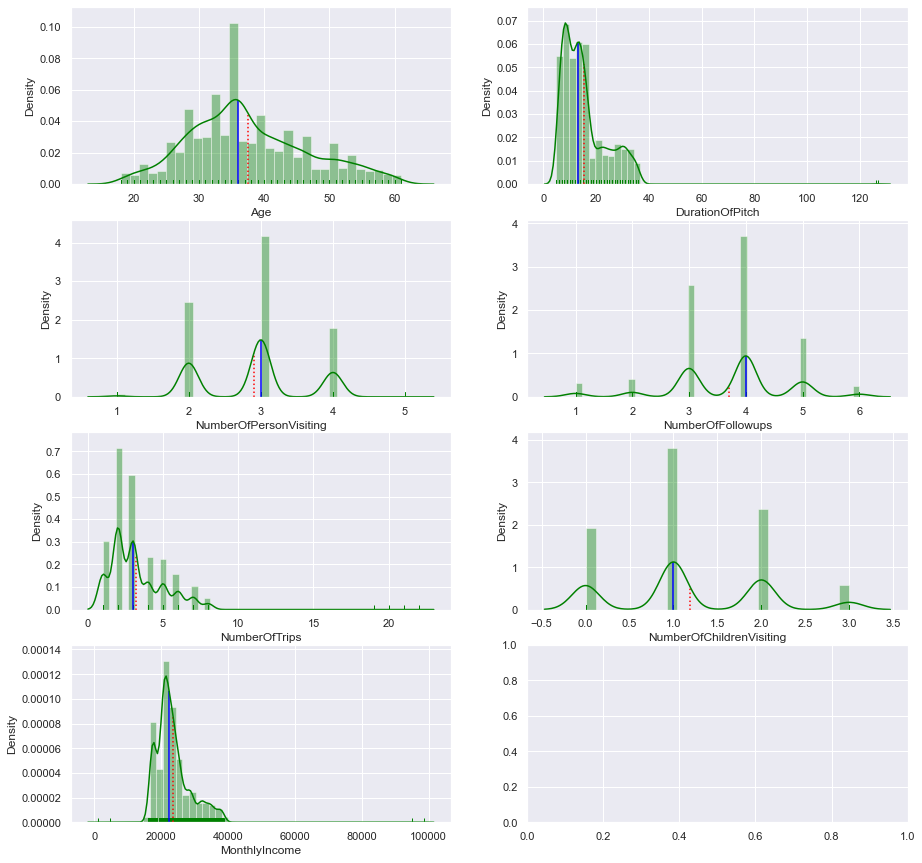

In [12]:
# plotting histograms for all numerical variables.

# List of numerical varaibles.
numerical_col = dfTourism.select_dtypes(include=np.number).columns.tolist()
# A plot with 4 rows and 2 columns, both zero indexed. 
# Row i and Column j represented by axes[i,j] will represnt one histogram
# For example the 4th numerical variabble from numerical_col will have an index equal to 3
# int(3/2)=1 and 3%2=1(the rest) that will be in second row  and second column 
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
for i in range(len(numerical_col)):    
    ax= sns.distplot(ax=axes[int(i/2), i%2], x=dfTourism[numerical_col[i]], color='green',rug=True, axlabel=numerical_col[i]) 
    line = ax.lines[0]
    xs = line.get_xdata()
    ys = line.get_ydata()
    # Plotting a dotted  red line for the mean after calculting the mean and the height of the line
    mean = dfTourism[numerical_col[i]].mean()
    height_mean = np.interp(mean, xs, ys)
    ax.vlines(mean, 0, height_mean, color='red', ls='dotted')
    # Plotting a solid blue line for the median after calculting the median and the height of the line
    median = dfTourism[numerical_col[i]].median()
    height_median = np.interp(median, xs, ys)
    ax.vlines(median, 0, height_median, color='blue', ls='solid')

**Observations**
- NumberOfPersonVisiting and NumberOfFollowups distributions are negatively skewed where the mean is less than the median.
- The rest of variables distribution is positively skewed where the mean is higher than the median.
- 3 is the highest count among all observations for NumberOfPersonVisiting
- 4 is the highest count among all observations for NumberOfFollowups.
- 1 is the highest count among all observations for NumberOfChildrenVisiting.

#### Investigating outliers in every numerical column

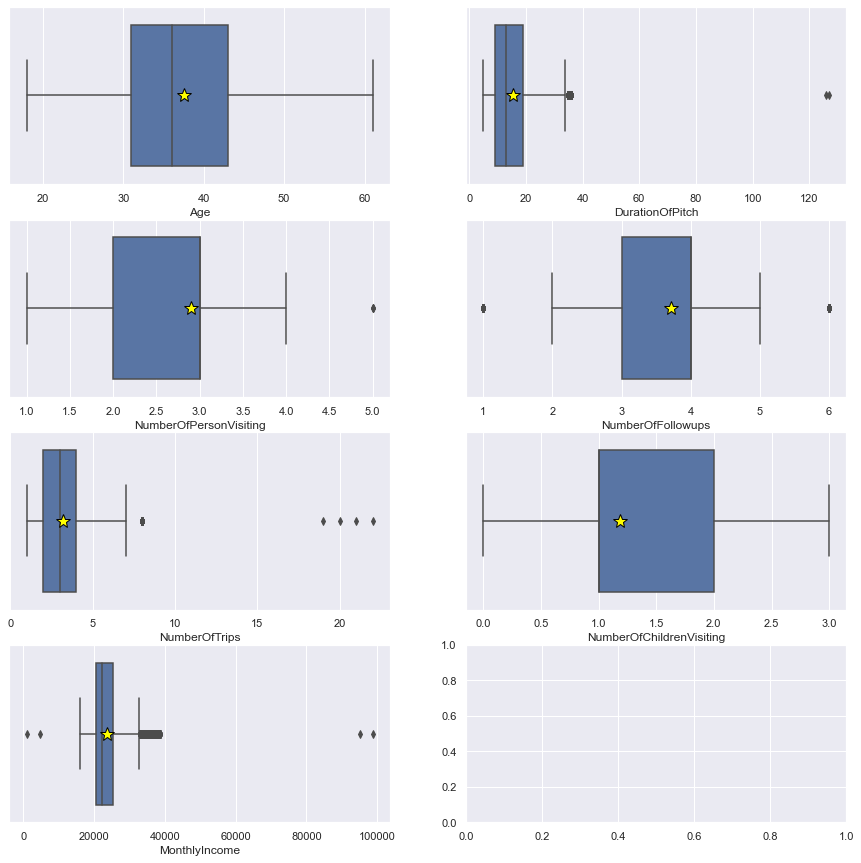

In [13]:
# outlier detection using boxplot
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
# A plot with 4 rows and 2 columns, both zero indexed. 
# Row i and Column j represented by axes[i,j] will represnt one boxplot
# For example the 7th numerical variabble from numerical_col here is monthlyIncome will have an index equal to 6
# int(6/2)=3 and 6%2=0(the rest) that will be in row index number 3(fourth row) and column index number 0(first column)

for i in range(len(numerical_col)):    
    sns.boxplot(ax=axes[int(i/2), i%2], data=dfTourism, x=dfTourism[numerical_col[i]],\
                # Plotting the mean on theboxplot as a yellow star with a black edge
                showmeans=True, meanprops={"marker":"*", "markerfacecolor":"yellow", \
                "markeredgecolor":"black","markersize":"15"})                   

**Observations**
* Age and NumberOfChildrenVisiting have no outliers.
* MonthlyIncome and NumberOfFollowups has both lower and upper outliers, however NumberOfFollowups can have these values 1 and 6.
* All other numerical columns have upper outliers, however NumberOfPersonVisiting can have the value of 5 and therefore we won't treated as an outlier
* We will treat outliers for MonthlyIncome, NumberOfTrips, and DurationOfPitch by assigning the lower wisker value to the lower outliers and the higher wisker value to upper outliers since outliers adversely affect the predictive boosting because boosting builds each tree on previous trees' residuals/errors. 

#### Distribution of  Categorical Variables

In [14]:
#Function to add the percentage of each class of the category
def perc_on_bar(plot, feature):
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage

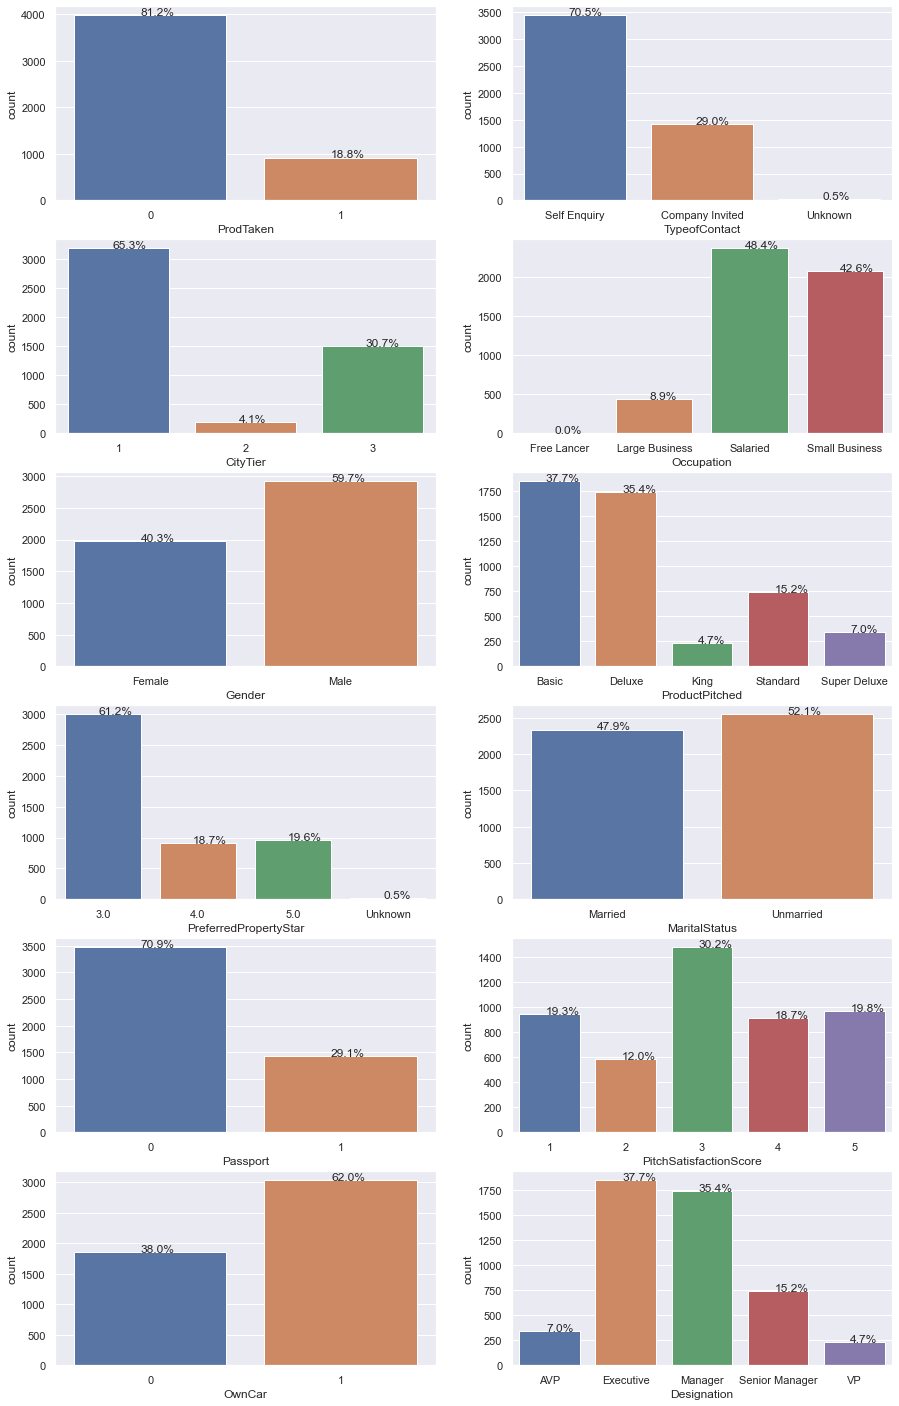

In [15]:
# Plotting barplots for categorical variables.
fig, axes = plt.subplots(6, 2, figsize=(15, 25))
# A plot with 6 rows and 2 columns, both zero indexed. 
# Row i and Column j represented by axes[i,j] will represnt one boxplot
# For example the 7th categorical variable from categorical_col here is Gender will have an index equal to 6
# int(5/2)=2 and 6%2=0(the rest) that will be in row number 2(third row) and column number 0(first column)

for i in range(len(categorical_col)):    
    ax=sns.countplot(ax=axes[int(i/2), i%2], data=dfTourism , x=dfTourism[categorical_col[i]])  
    perc_on_bar(ax, dfTourism[categorical_col[i]])

**Observations**
* Only 18.8% of the customers purchased a package.
* 70.5% of customers were contacted after a self enquiry.
* The majority of customers (65.3%) live a city tear of 1 .
* 48.4% of the customers are salaried, while 42.6% own a small business and 8.9% own a large business. Therfore the customers that own a business are slightly more than salaried customers.
* 59.7% of the customers are male and 40.3% are female.
* 37.7% of customers were offered the basic package, 35.4% were offered the deluxe package, 15.2% were offered the standard package, 7% of customers were offered the super deluxe and 4.7% were offered the king package. we observe that the company focuses on offering the basic and the deluxe packages.
* The majority of customers prefer the 3 star hotles with a 61.2%, while 19.6% of the customers prefer 5 star hotles and 18.7% prefer 4 start hotels.
* 47.9% of the customers are married and 52.1% are not married(Single, divorced, and unmarried), in the feature engineering we will group these three categories under the Unmarried categorical value.
* 70.9% of customers don't have a passport while 21.9% do.
* The majority of customers gave score of 3 for Sales pitch satisfaction score with 30.2%, then the score of 5 for 19.8%, then a score of 1 for 19.3%, then the score of 2 for 12% of the customers.
* 62% of the customers own a car and 38% don't.
* Most of the customers are Executives(37.7%) or Managers(35.4%) in their current organization, then 15.2% are senior managers, then 7% are AVP and lastly 4.7% are VP.

### Bivariate Analysis

#### Relationship between numerical variables using pair plots and correlation plots 

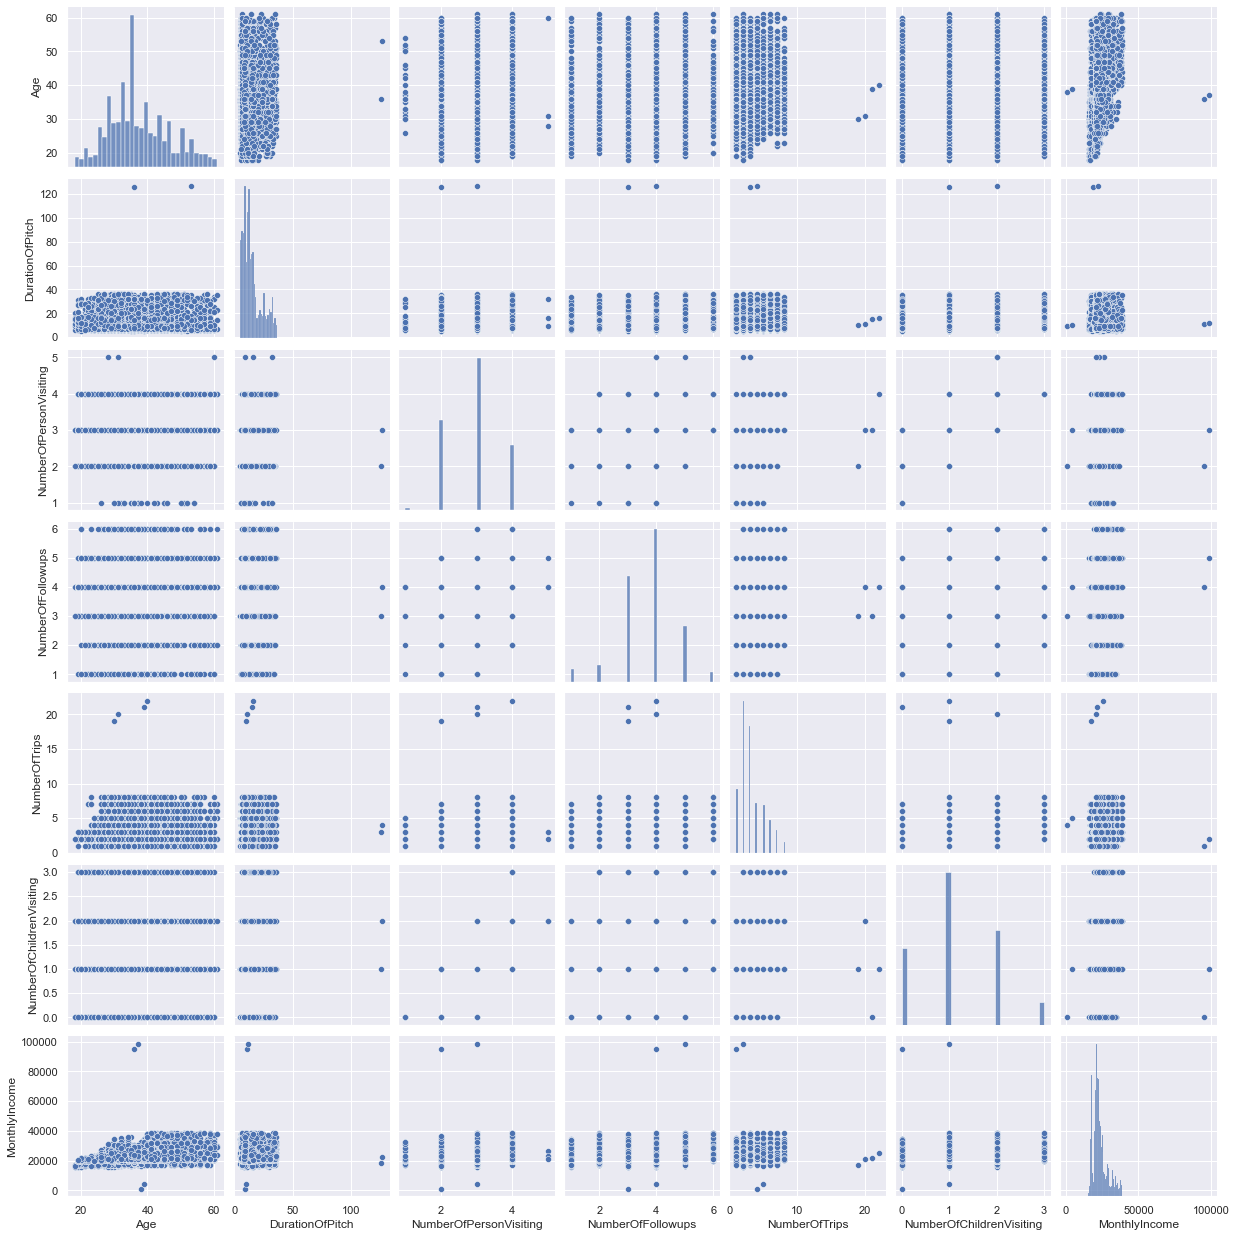

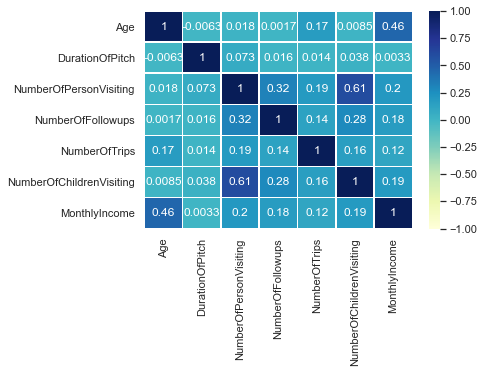

In [16]:
# pairplot: Visualize pairwise relationship in the dataset.
sns.pairplot(dfTourism[numerical_col])
plt.show()
# heatmap: Plot rectangular data as a color-encoded matrix, where each cell represents the correlation between 
# the two corresponding quantitative attributes
sns.heatmap(dfTourism[numerical_col].corr(), annot=True, linewidths=0.5, center=0, cmap='YlGnBu', vmin=-1, vmax=1)
plt.show()

**Observations**
* As expected, there is a strong  positive correlation between NumberOfPersonVisiting and NumberOfChildrenVisiting.
* There is a kind of strong positive correlation between Age and MonthlyIncome.
* There are no strong correaltions between the other numerical variables.
* All of the correlations are positive except for the one between DurationOfPitch and Age which is a negative one. 

####  ProdTaken vs Age 

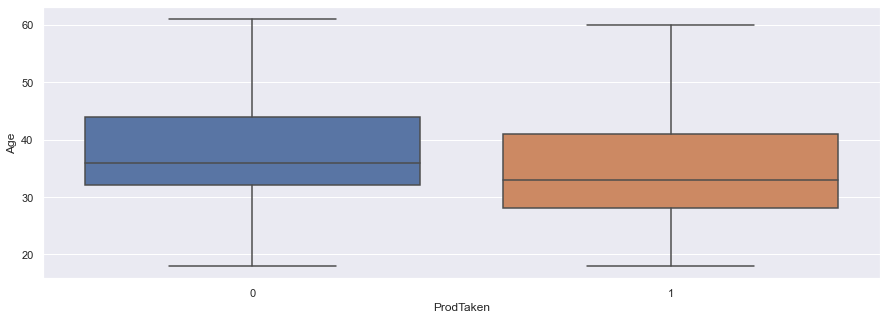

In [17]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15,5))
sns.boxplot(x='ProdTaken',y="Age",data=dfTourism);

**Observations**
- The median Age for customers that purchased a package is lower than the customer that didn't.

####  ProdTaken vs DurationOfPitch 

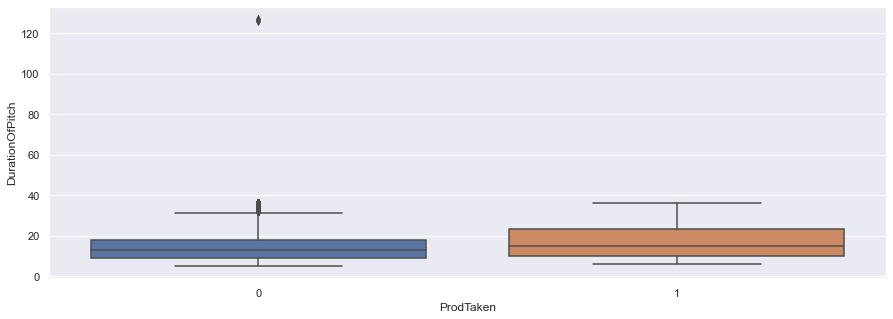

In [18]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15,5))
sns.boxplot(x='ProdTaken',y="DurationOfPitch",data=dfTourism);

**Observations**
- The median DurationOfPitch for customers that purchased a package is slightly higher than the customer that didn't.

####  ProdTaken vs NumberOfPersonVisiting 

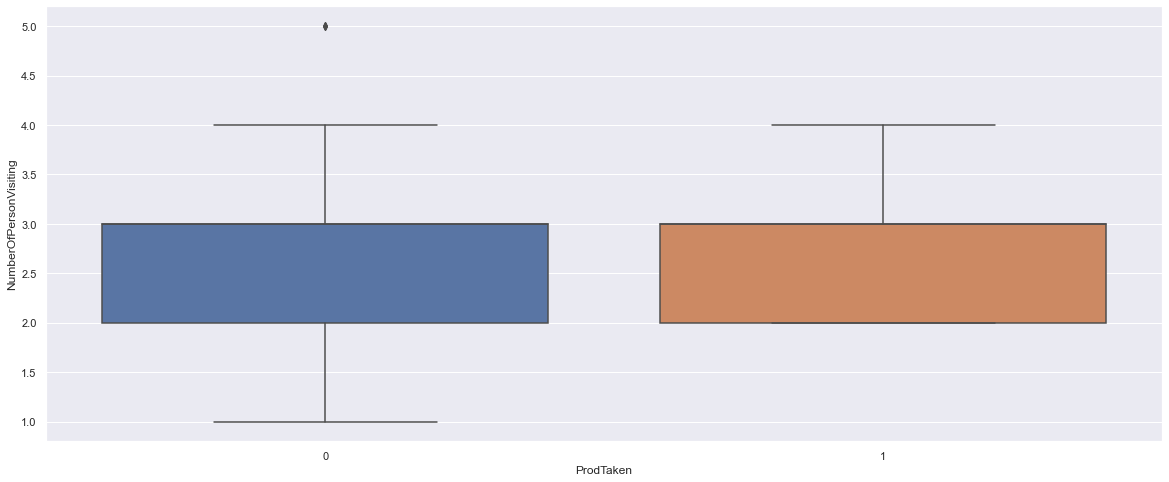

In [19]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(20,8))
sns.boxplot(x='ProdTaken',y="NumberOfPersonVisiting",data=dfTourism);

**Observations**
- The customers that purchased a package have a minumum of NumberOfPersonVisiting of 2.
- The median is the same for customers that did purchased a package and the customers that didn't.

####  ProdTaken vs NumberOfFollowups 

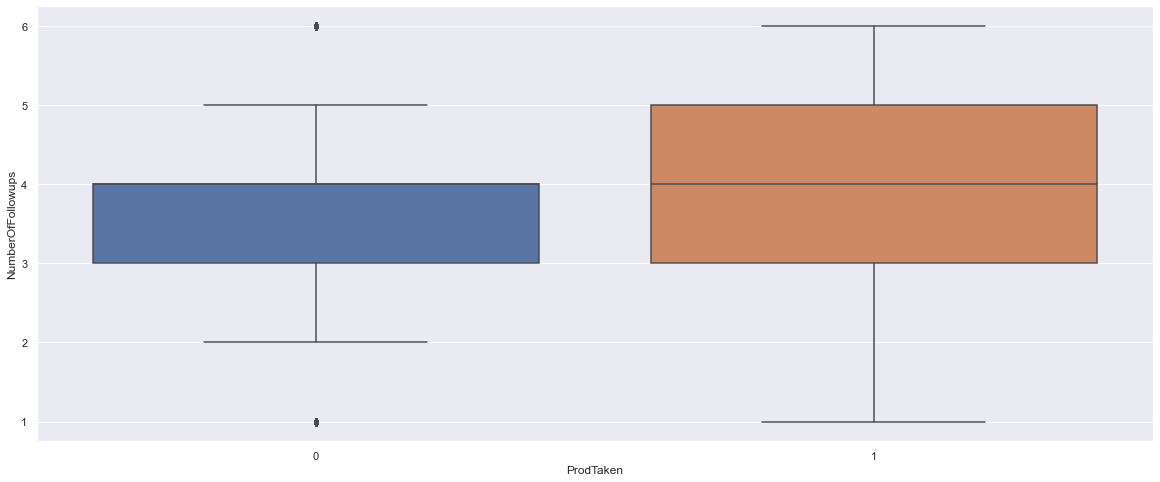

In [20]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(20,8))
sns.boxplot(x='ProdTaken',y="NumberOfFollowups",data=dfTourism);

**Observations**
- The median of NumberOfFollowups for customers that purchased a package is higher than the customer that didn't.

####  ProdTaken vs NumberOfTrips 

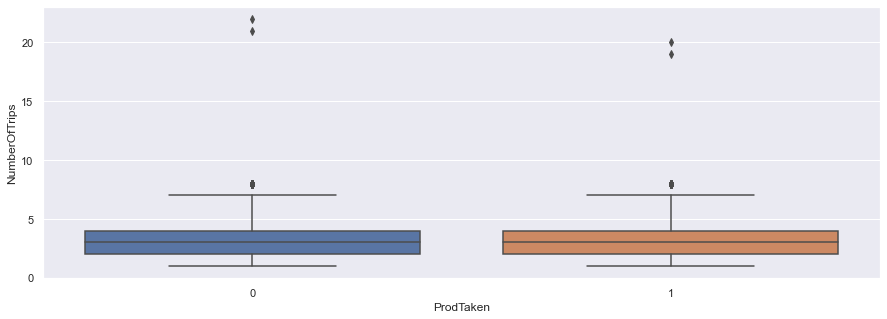

In [21]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15,5))
sns.boxplot(x='ProdTaken',y="NumberOfTrips",data=dfTourism);

**Observations**
- The median and the range of NumberOfTrips for customers that purchased a package is about the same  than customers that didn't.

####  ProdTaken vs NumberOfChildrenVisiting 

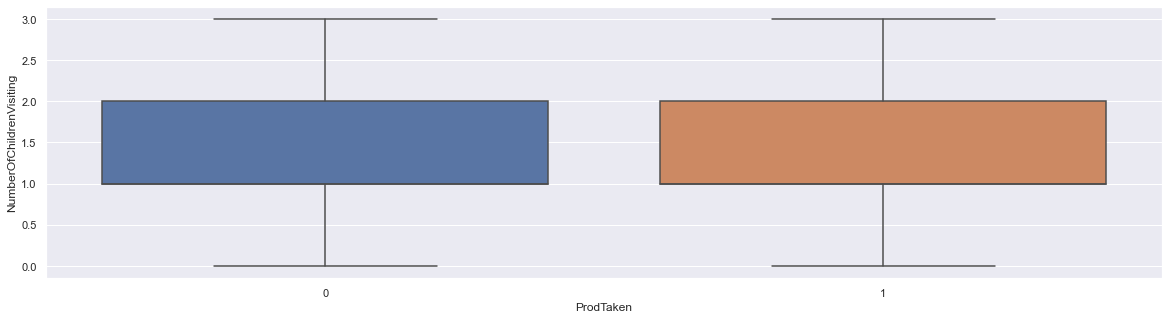

In [22]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(20,5))
sns.boxplot(x='ProdTaken',y="NumberOfChildrenVisiting",data=dfTourism);

**Observations**
- The median and the range of NumberOfChildrenVisiting for customers that purchased a package are the same as the customers that didn't.

####  ProdTaken vs MonthlyIncome 

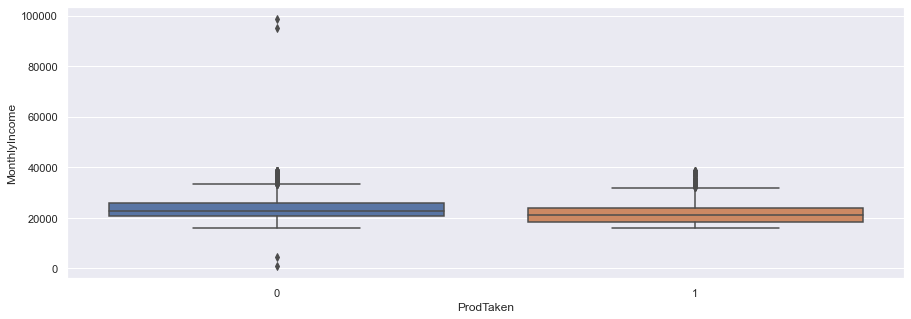

In [23]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15,5))
sns.boxplot(x='ProdTaken',y="MonthlyIncome",data=dfTourism);

**Observations**
- The median MonthlyIncome for customers that purchased a package is slightly smaller than the customer that didn't.
- The majority of customers that purchased a package have a monthly income between ~18k and ~32K.

In [24]:
# Function to plot a stacked bar charts of Personal_Loan vs an independent variable
def stacked_plot(x):
#     sns.set(palette='twilight_shifted')
    tab1 = pd.crosstab(x,dfTourism['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,dfTourism['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### ProdTaken vs TypeOfContact

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
Unknown            22    3    25
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


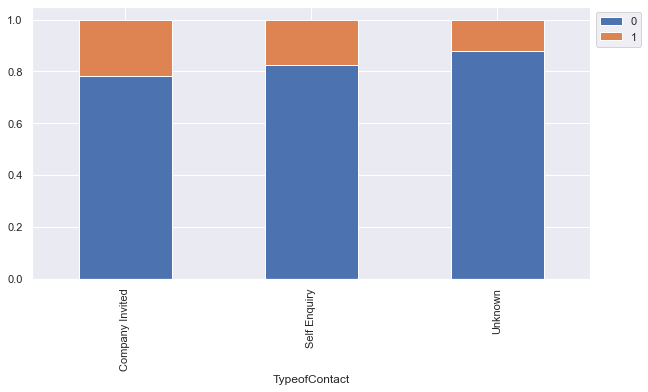

In [25]:
stacked_plot(dfTourism['TypeofContact'])

**Observations**
- The percentage of customers that purchased a package is slightly higher for customers that were invited by the company.

#### ProdTaken vs CityTier

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


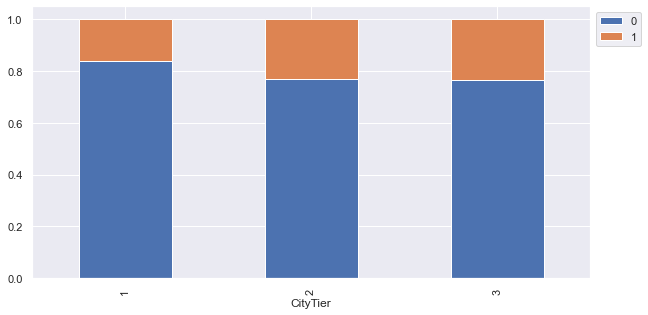

In [26]:
stacked_plot(dfTourism['CityTier'])

**Observations**
- The percentage of customers purchasing a package is the same for customers living in a  City tier of 2 and 3 and is higher than the ones living in  City tier of 1.

#### ProdTaken vs Occupation

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


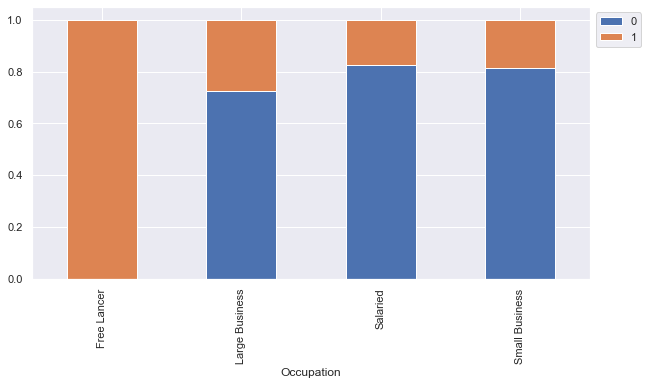

In [27]:
stacked_plot(dfTourism['Occupation'])

**Observations**
- 100% of Free Lancer puchased a package, however we can't generalize this finding because we have just two customers with this categorical value.
- The percentage of customers purchasing a package is higher for customers owning a large business than for customers  owning a small business or salaried customers.
- The company should focus the offering of packages to customers owning a  large business,

#### ProdTaken vs Gender

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


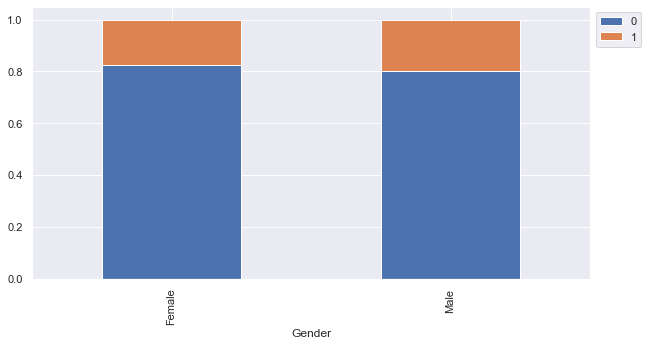

In [28]:
stacked_plot(dfTourism['Gender'])

**Observations**
- The percentage of customers purchasing a package is about the same for both female and male customers(slightly higher for male: about 2% difference).

#### ProdTaken vs ProductPitched

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


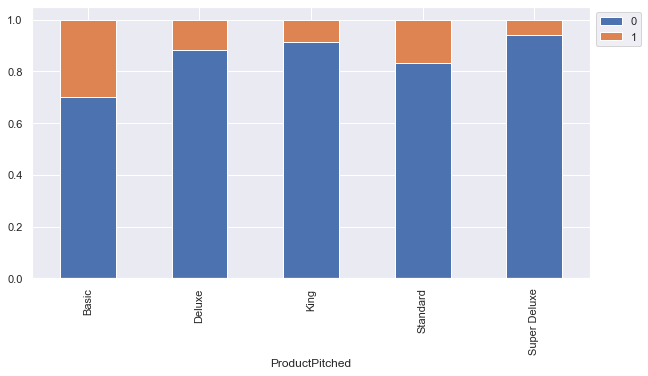

In [29]:
stacked_plot(dfTourism['ProductPitched'])

**Observations**
- The percentage of customers purchasing a pitched package is the highest for Basic, then Standard, then Deluxe, then King then Super Deluxe.

#### ProdTaken vs PreferredPropertyStar

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2511  482  2993
4.0                     731  182   913
5.0                     706  250   956
Unknown                  20    6    26
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


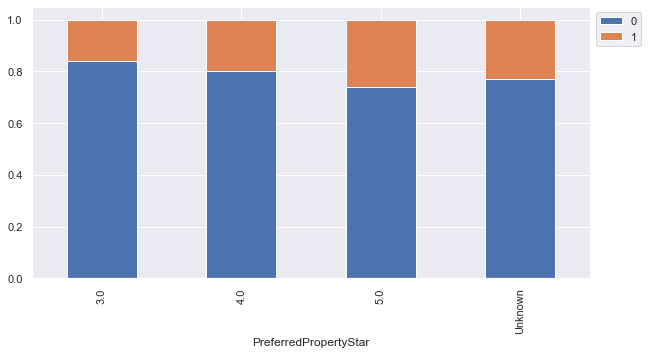

In [30]:
stacked_plot(dfTourism['PreferredPropertyStar'])

**Observations**
- The percentage of customers that purchased a package is the highest for a 5 star hotels, then 4 star hotels, then 3 stars hotels. however the difference isn't that big.

#### ProdTaken vs MaritalStatus

ProdTaken         0    1   All
MaritalStatus                 
Married        2014  326  2340
Unmarried      1954  594  2548
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


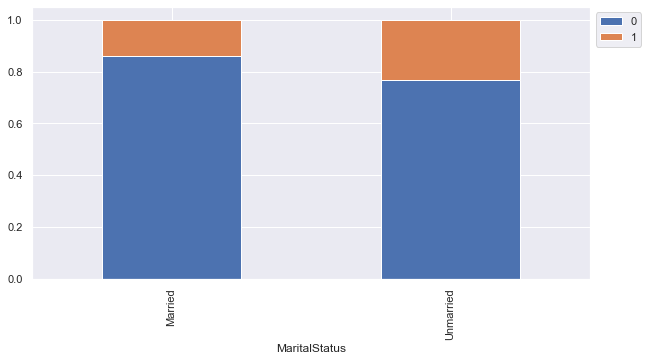

In [31]:
stacked_plot(dfTourism['MaritalStatus'])

**Observations**
- The percentage of customers that purchased a package is higher(almost double) for Unmarried customers than married customers.

#### ProdTaken vs Passport

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


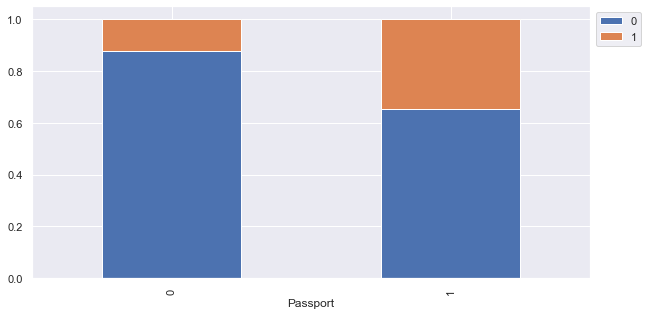

In [32]:
stacked_plot(dfTourism['Passport'])

**Observations**
- The percentage of customers that purchased a package is way higher(more by about 3 folds) for customers that have passport than customers that they don't.
- The company should focus on offering packages to customers with passports.

#### ProdTaken vs PitchSatisfactionScore

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


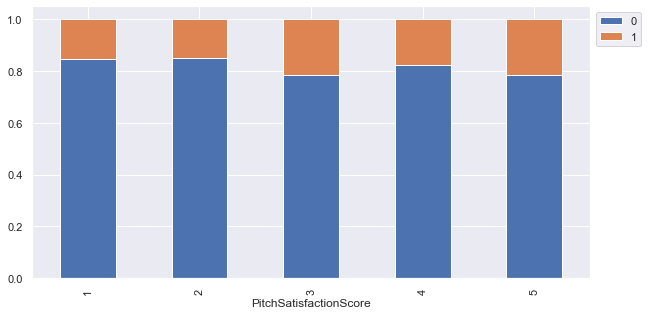

In [33]:
stacked_plot(dfTourism['PitchSatisfactionScore'])

**Observations**
- The percentage of customers that purchased a package is higher for Sales pitch satisfaction score of 3 and 5(the same), then 4, then 1 and 2(the same), however the difference isn't that big.

#### ProdTaken vs OwnCar

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


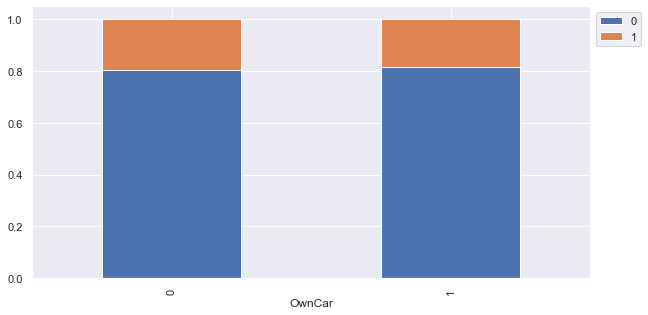

In [34]:
stacked_plot(dfTourism['OwnCar'])

**Observations**
- The percentage of customers that purchased a package is about the same for customers that own a car and customers that they don't.

#### ProdTaken vs Designation

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


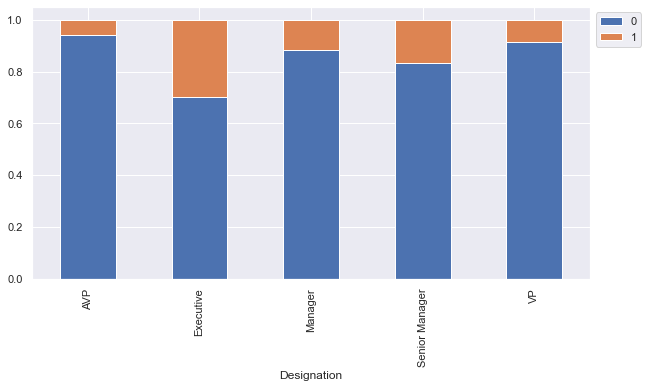

In [35]:
stacked_plot(dfTourism['Designation'])

**Observations**
- The percentage of customers that purchased a package is the highest for Executives, then senior managers, then managers, then VPs, then AVPs.
- The company should focus on offering packages to Executives , senior managers, and managers.

### Multivariate Analysis

#### ProdTaken vs Age vs ProductPitched

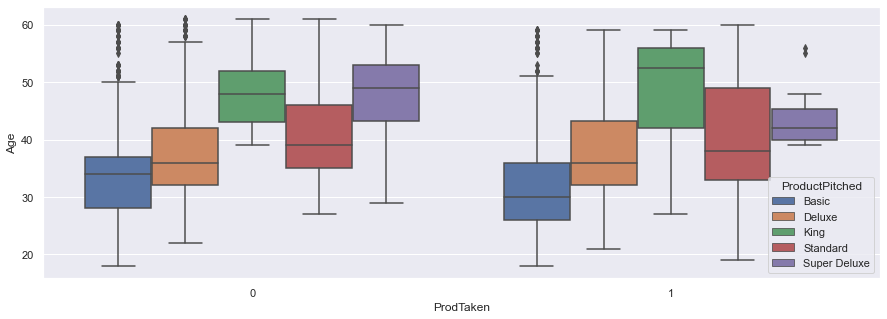

In [36]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15,5))
sns.boxplot(x='ProdTaken',y="Age",data=dfTourism, hue= 'ProductPitched');

**Observations**
- The median age of customers that purchased a package is the highest for King package(about 53 years old) and is the lowest for Basic package(about 30 years old).
- The median age of customers that purchased a package is more than 40 for King and Super Deluxe, and smaller than 40 for the rest.
- The median age of customers that purchased a  basic package is lower(by about 5 years) than customers that didn't.
- The median age of customers that purchased a King package is higher(by about 5 years) than customers that didn't
- The median age for the rest is about the same.

#### ProdTaken vs NumberOfFollowups vs ProductPitched

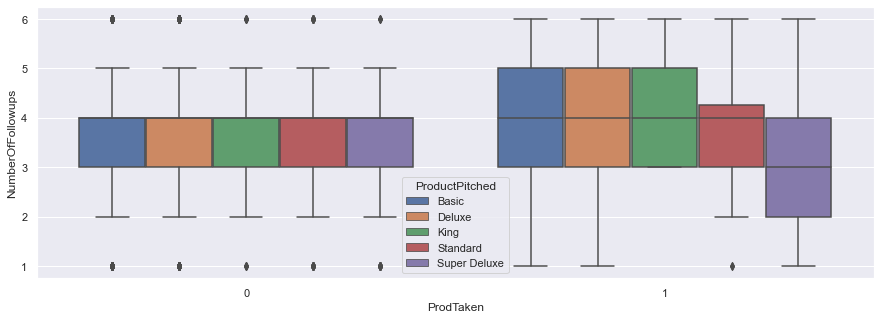

In [37]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15,5))
sns.boxplot(x='ProdTaken',y="NumberOfFollowups",data=dfTourism,hue= 'ProductPitched');

**Observations**
- The median of NumberOfFollowups for customers that purchased a package is the same among all products except for the super Deluxe where it is smaller.
- For customers that didn't purchase a package median and range is the same among all products.
- The median of NumberOfFollowups for customers that purchased a package is higher than the customers that didn't for all packages except the super Deluxe where it is smaller.

####  ProdTaken vs MonthlyIncome vs ProductPitched

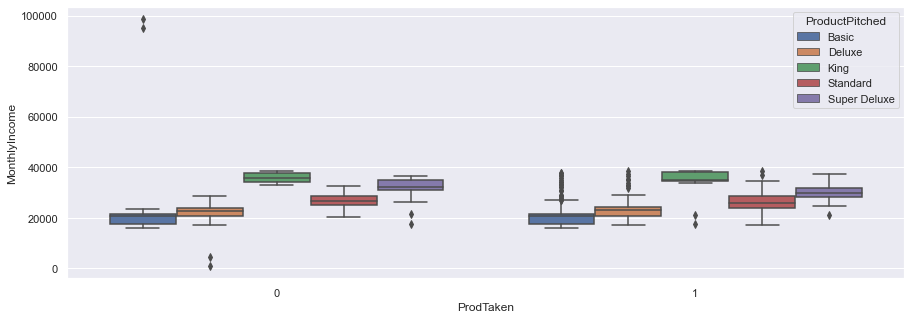

In [38]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15,5))
sns.boxplot(x='ProdTaken',y="MonthlyIncome",data=dfTourism,hue= 'ProductPitched');

**Observations**
- The median MonthlyIncome is the highest for King, then Super Deluxe, then Standard, then Deluxe, then Basic. This is true for customers that purchased a package and for customers that they didn't.

####  Age vs MonthlyIncome vs ProdTaken

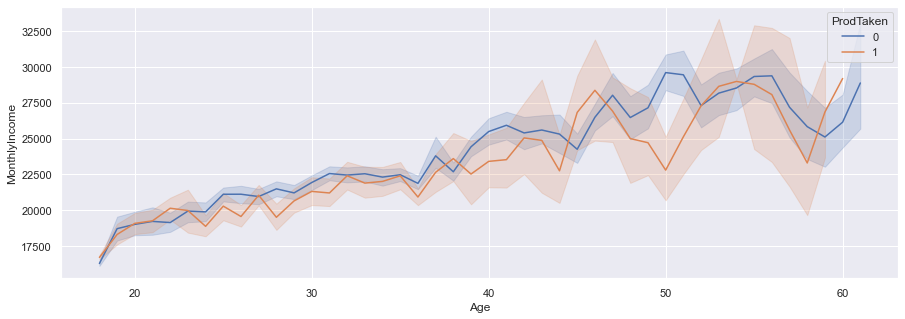

In [39]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Age', y='MonthlyIncome',hue='ProdTaken', data=dfTourism);

**Observations**
- Almost for all ages, the MonthlyIncome of cutomers that purchased a package is lower than customers that didn't, this can be explained that customers with lower income usually have a more stressful life than customers that have a higher monthly income. Hence going for a vacation is a good way to alleviate this stress,

####  ProdTaken vs NumberOfTrips vs ProductPitched

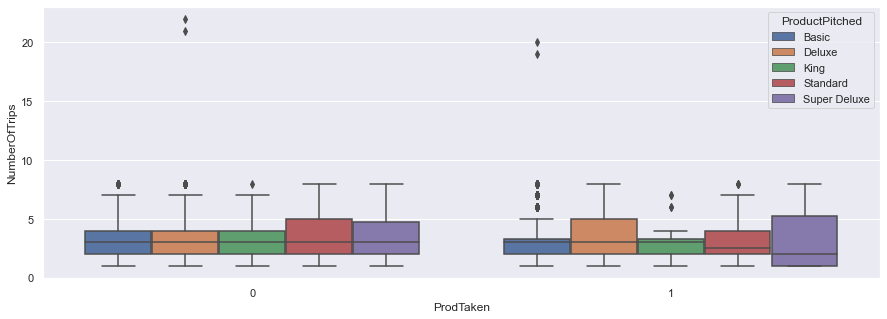

In [40]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15,5))
sns.boxplot(x='ProdTaken',y="NumberOfTrips",data=dfTourism,hue= 'ProductPitched');

**Observations**
- We observe that the maximum of numberOfTrips for customers that purchased a package is notably smaller than the customers that didn't for Basic(the most popular package: out of the 920 customers that purchased a package, 552 customers purchased the basic one) and King packages.
- The company shoud focus on customers with a low number of trips when pitching a package.

#### ProdTaken vs CityTier vs ProductPitched

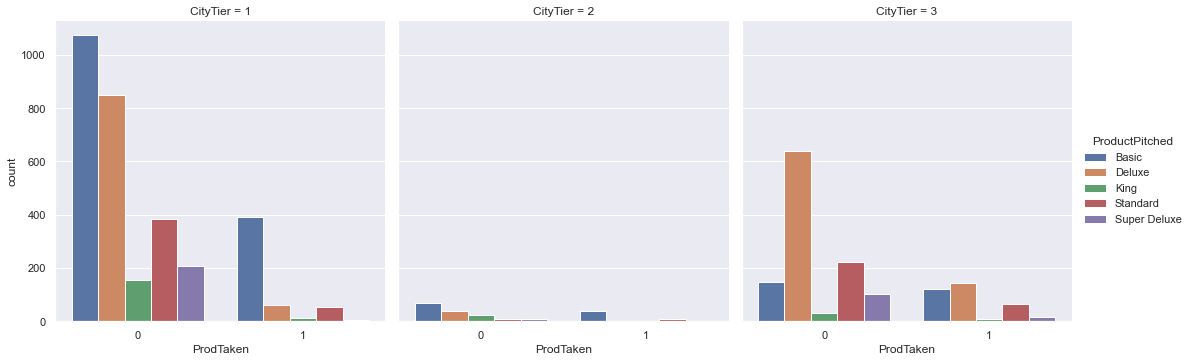

In [41]:
sns.catplot(x='ProdTaken' ,data=dfTourism, col='CityTier', kind="count", hue='ProductPitched');

**Observations**
- We observe that the conversion of purchasing a pitched package is higher for customers that live in a city tier of 3. 
- The company should pitch the basic package to more customers in this categorical city tier value of 3. This could be the result of customers living in a harsher city environment and they need a break. 

#### ProdTaken vs Occupation vs ProductPitched

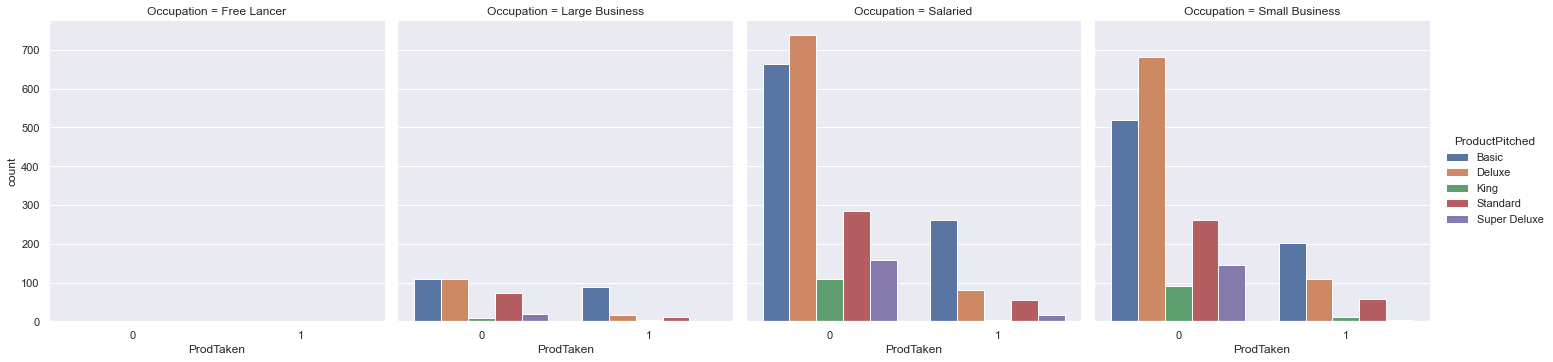

In [42]:
sns.catplot(x='ProdTaken' ,data=dfTourism, col='Occupation', kind="count", hue='ProductPitched');

**Observations**
- Only customers that own a small business purchased a king package, the company should pitch the king package to more customers that own a small business.
- The conversion of the pitched products is the highest for the Basic one, the company should pitch this package to more customers that own a large business.

#### ProdTaken vs MaritalStatus vs ProductPitched

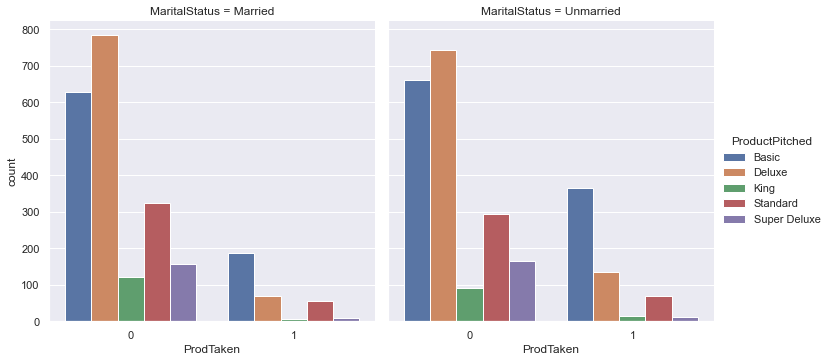

In [43]:
sns.catplot(x='ProdTaken' ,data=dfTourism, col='MaritalStatus', kind="count", hue='ProductPitched');

**Observation**
- The number of customers purchasing the  king package is higher for unmarried than married customers even we are pitching this package to more married customers than unmarried customer. this also true for standard packages
- The comapny should pitch these packages(king and Standard) to more unmarried customers than married customers.

#### ProdTaken vs Passport vs ProductPitched

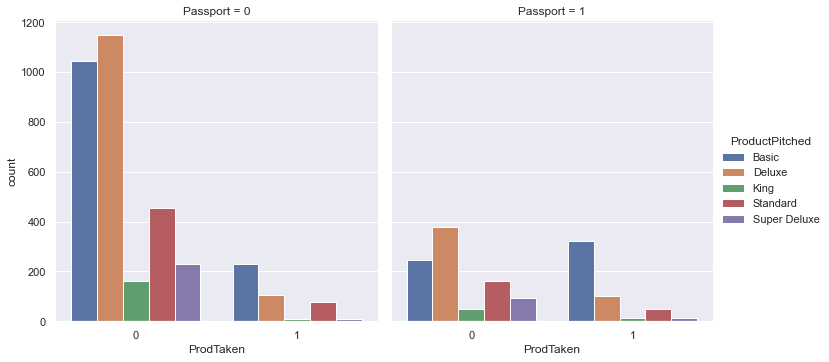

In [44]:
sns.catplot(x='ProdTaken' ,data=dfTourism, col='Passport', kind="count", hue='ProductPitched');

**Observations**
- For customers that have passports, we observe that the conversion of purchasing a pitched package is higher for the basic package than for customers that they don't. 
- The company should pitch the basic package to more customers with passports.

#### ProdTaken vs Designation vs ProductPitched

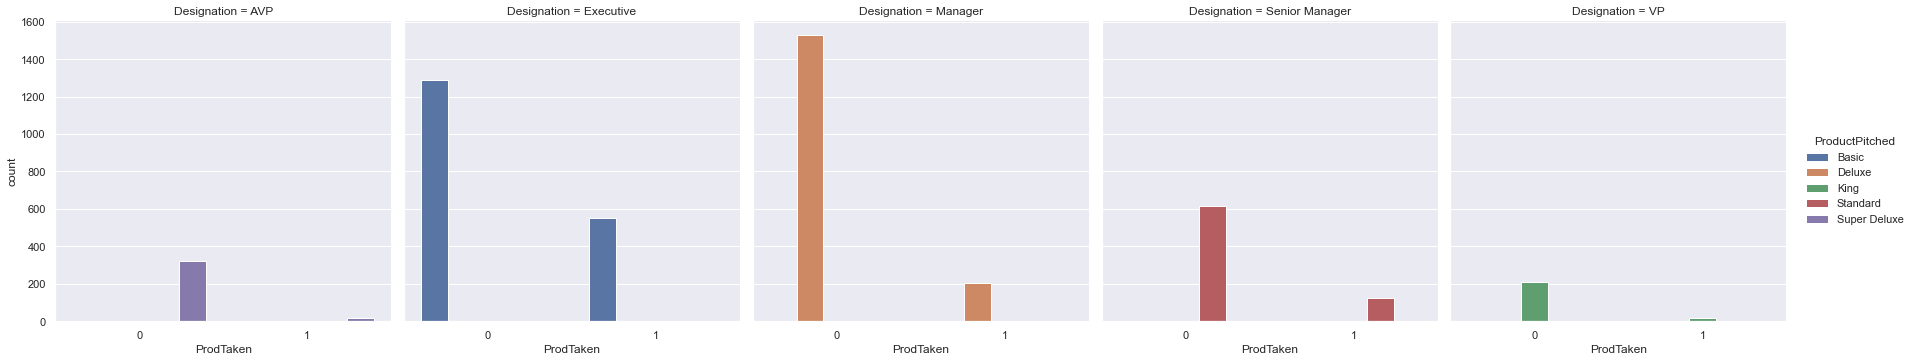

In [45]:
sns.catplot(x='ProdTaken' ,data=dfTourism, col='Designation', kind="count", hue='ProductPitched');

**Observations**
- The company is offering to each Designation categorical value a type of package:
    - King for VP.
    - Super Deluxe for AVP.
    - Standard for Senior managers.
    - Deluxe  for managers.
    - Basic for executives.
- The company should revise this strategy, perhaps it is better to pitch more that one product to each Designation category.
- Perhaps it is better to offer the packages based on the MonthlyIncome.

### Conclusion and Insights

* The customers age range is from 18 years old to 61 years old.
* From all the customers, only 18.8% of the customers purchased a package.
* The majority of customers (65.3%) live a city tear of 1 .
* The distribution of customers is almost even between salaried customers and customers that own a business (48.4% are salaried customers).
* About 3/5 of the customers are male.
* 61.2% of customers prefer the 3 star hotles while the least preferred is 4 star hotels with with 18.7% of customers.
*  The distribution of customers is almost even between married customers and unmarried customers, 47.9% of the customers are married and 52.1% are not married(Single, divorced, and unmarried).
* The majority of customers(70.9% of customers) don't have a passport.
* About 3/5 of the customers(62% of customers) own a car .
* Most of the customers are Executives(37.7%) or Managers(35.4%) in their current organization, then 15.2% are senior managers, then 7% are AVP and lastly 4.7% are VP.
#### Recommendations to the Marketing team to grow the business:

* Customers that have passports and are unmarried purchase a pitched package more that customers that are married and don't have passport. Also all the customers that purchased a package are at least a group of two persons:
    - the company should focus on this category of customers when pitching a given package.
* The king package was purchased only from customers that own a small business, the company should pitch this package more to customers that own a small business.
* The comapny and after pitching a product should try to maximize the number of follow ups.
* The company should pitch its packages to customers that don't have a large number of trips per year.
* Among all customers designation in their current organization, we observed that executives have the highest percentage of purchasing a pitched package, Knowing that the company is offering only the basic package(We assume is the cheapest package) to this segment of customers we advise that the company should offer more diverse packages(more expensine packages) to this type of customers.
- Generalizing the previous point:
  - The company should pitch more that one product to each Designation since currently the company is pitching:
    - King for VP.
    - Super Deluxe for AVP.
    - Standard for Senior managers.
    - Deluxe  for managers.
    - Basic for executives.
  - The comapny should change its policy in pitching its packages, perhaps by targeting the customers based on their monthly income and not their designation.

### Data Preparation

#### Fixing the outliers for  MonthlyIncome, NumberOfTrips, and DurationOfPitch

In [46]:
# Functions to treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)    
    return df

In [47]:
#List of numerical variables that needs to be treated 
num_columns=['MonthlyIncome', 'NumberOfTrips', 'DurationOfPitch' ]
#Treating the outliers in dfLoanModel
dfTourism = treat_outliers_all(dfTourism,num_columns)

#### Dropping some features and splitting the data

In [48]:
# We will drop PitchSatisfactionScore, ProductPitched, NumberOfFollowups, DurationOfPitch variables since these variables are
# customer interaction(after pitching a product) data and for existing products, and the models that we are going to build is to predict for a new product.
dfTourism.drop(['PitchSatisfactionScore', 'ProductPitched', 'NumberOfFollowups', 'DurationOfPitch'], axis=1, inplace=True)
# independant variables
X = dfTourism.drop('ProdTaken', axis=1)
# the dependent variable
y = dfTourism[['ProdTaken']]
# Creating dummies variable for the catgorical varaibles
X = pd.get_dummies(X, drop_first=True)
# Split X and y into train and test sets in 70:30 ratio, stratify=y:to ensure that relative class frequencies are approximately 
# preserved in train and test sets(since in the data 18.8% is for class 1 and 81.2% for class 0 .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
# Checking the distribution of the split
print(f'There are {X_train.shape[0]} observations in the train set and there are {X_test.shape[0]} in the test set')
print(f'In the train set {y_train.value_counts()[1]} observations with target value of 1 and in the test set {y_test.value_counts()[1]} observations with target value of 1')

There are 3421 observations in the train set and there are 1467 in the test set
In the train set 644 observations with target value of 1 and in the test set 276 observations with target value of 1


### Model evaluation criterion

#### Model can make wrong predictions as:
1. Predicting a customer will purchase a package when the customer don't(False Positives\ Type 1 error): Loss of effort and resources when one of the company goals is to make the marketing expenditure more efficient. Therefore this loss is expensive to the company 
2. Predicting a customer will not purchase a package when the customer do(False Negatives\ Type 2 error): Loss of a potential customer that will purchase the new package. Therefore this loss is expensive too, since one of the company goals is to expand its customer base and therefore to grow the business.

#### Which case is more important? 
* They are both important. The company should reduce both losses as much  as possible 

####  How to reduce these losses?
* Company wants Recall and Precision to be maximized, greater the Recall higher the chances of minimizing false negatives, and greater the Precision higher the chances of minimizing false positives. Hence, the focus should be on increasing both Recall and Precision. In such a case f1-socre is a good metric of interest since f1-score conveys the balance between the precision and the recall. Therefore our goal is to maximize the f1-score with a high accuracy.

**Let's define function to provide metric scores(accuracy,recall,precision and f1-score) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [49]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = accuracy_score(pred_train,y_train)
    test_acc = accuracy_score(pred_test,y_test)
    
    train_recall = recall_score(y_train,pred_train)
    test_recall = recall_score(y_test,pred_test)
    
    train_precision = precision_score(y_train,pred_train)
    test_precision = precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,y_train))
        print("Accuracy on test set : ",accuracy_score(pred_test,y_test))
        print("Recall on training set : ",recall_score(y_train,pred_train))
        print("Recall on test set : ",recall_score(y_test,pred_test))
        print("Precision on training set : ",precision_score(y_train,pred_train))
        print("Precision on test set : ",precision_score(y_test,pred_test))
        print("F1-Score on training set : ",f1_score(y_train,pred_train))
        print("F1-Score on test set : ", f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [50]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Building our Predictor Models

### Decision Tree(CART) Model

- We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
- If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

- In this case, the frequency of purchasing a package is 18.82%(class 1) and rejecting the pitched package is 81.12%(class 0). Therefore we can pass a dictionary {0:0.19,1:0.81} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

- class_weight is a hyperparameter for the decision tree classifier.

In [51]:
# Building the Decision Tree model
model_tree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

#### Model Evaluation

Accuracy on training set :  1.0
Accuracy on test set :  0.8384458077709611
Recall on training set :  1.0
Recall on test set :  0.5144927536231884
Precision on training set :  1.0
Precision on test set :  0.5795918367346938
F1-Score on training set :  1.0
F1-Score on test set :  0.5451055662188099


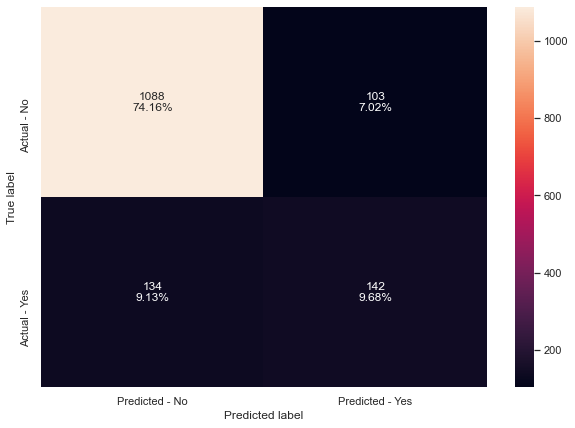

In [52]:
# Getting the metric scores 
get_metrics_score(model_tree)
# Getting the confusion matrix
make_confusion_matrix(model_tree,y_test)

**Observations**
* Decision tree is overfitting the training data. There is big differnce between Train and Test for all the metrics.
* Let's try to imporove the model by prepruning and postpruning

### Improving our Model by Prepruning
**Using GridSearch for Hyperparameter tuning of our tree model**
- This is a prepruning technique.
- Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
- It is an exhaustive search that is performed on a the specific parameter values of a model.
- The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [53]:
# Choose the type of classifier. 
model_tree_prepruned = DecisionTreeClassifier(random_state=1,class_weight = {0:0.19,1:0.81})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
            'max_leaf_nodes' : [2, 3, 5, 10],
            'min_impurity_decrease': [0.000001,0.00001,0.0001]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(f1_score )

# Run the grid search
grid_obj = GridSearchCV(model_tree_prepruned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_tree_prepruned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
model_tree_prepruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=1e-06,
                       random_state=1)

#### Model Evaluation

Accuracy on training set :  0.7983045893013738
Accuracy on test set :  0.814587593728698
Recall on training set :  0.515527950310559
Recall on test set :  0.4927536231884058
Precision on training set :  0.4676056338028169
Precision on test set :  0.5074626865671642
F1-Score on training set :  0.4903988183161004
F1-Score on test set :  0.5


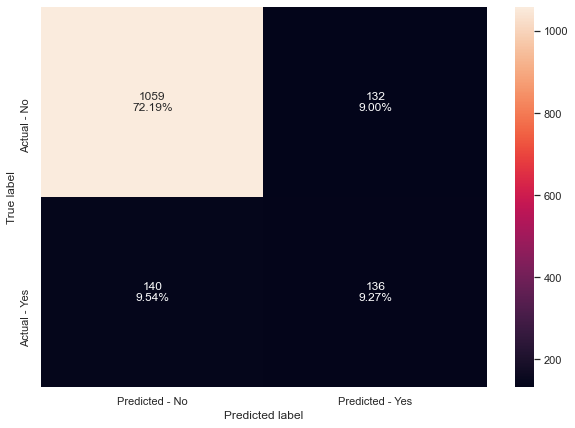

In [54]:
# Getting the metric scores 
get_metrics_score(model_tree_prepruned)
# Getting the confusion matrix
make_confusion_matrix(model_tree_prepruned,y_test)

**Observations**
- The model generalized well, metrics for train and test sets are comparable and very close.
- Preciosn and Recall scores are low, and by consequence the f1-score is low.

### Improving our Model by Postpruning via Cost Complexity Pruning
- In DecisionTreeClassifier, Cost Complexity Pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha

**Total impurity of leaves vs effective alphas of pruned tree**
- Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves

In [55]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0: 0.19, 1: 0.81})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,-0.000000
1,0.000000,-0.000000
2,0.000000,-0.000000
3,0.000000,-0.000000
4,0.000000,-0.000000
...,...,...
327,0.006832,0.415310
328,0.009041,0.424351
329,0.013234,0.437585
330,0.019918,0.457503


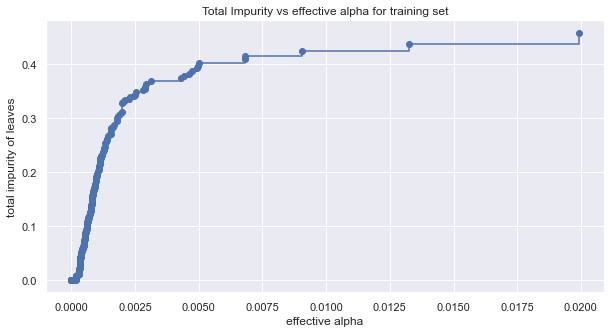

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [57]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0: 0.182, 1: 0.818})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04248055541724738



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

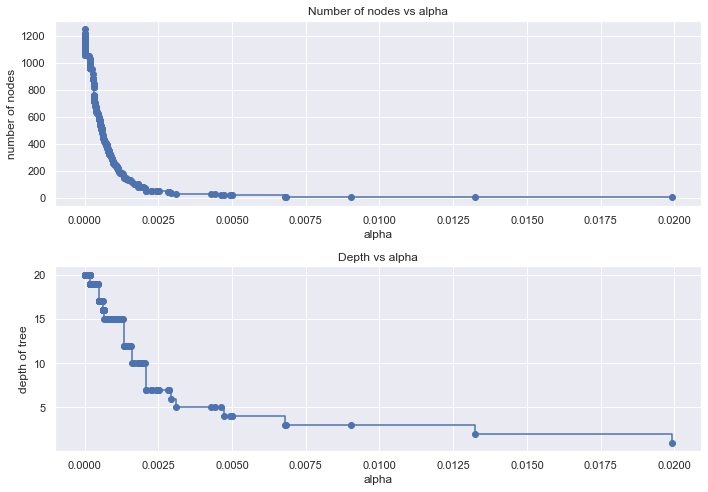

In [58]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Since  accuracy isn't the right metric for our data we would want high f1-score

In [59]:
f1score_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=f1_score(y_train,pred_train3)
    f1score_train.append(values_train)

In [60]:
f1score_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=f1_score(y_test,pred_test3)
    f1score_test.append(values_test)

In [61]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

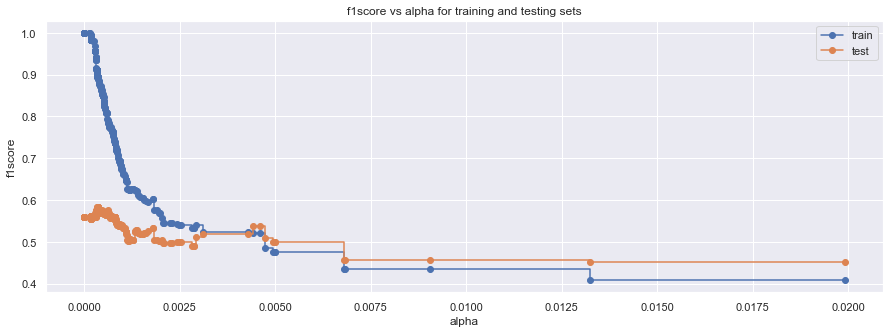

In [62]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("f1score")
ax.set_title("f1score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1score_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, f1score_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [63]:
# creating the model where we get highest train on test f1-score
index_best_model = np.argmax(f1score_test)
model_tree_postpruned = clfs[index_best_model]
model_tree_postpruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00034592783374459,
                       class_weight={0: 0.182, 1: 0.818}, random_state=1)

#### Model Evaluation

Accuracy on training set :  0.9555685472084186
Accuracy on test set :  0.8241308793456033
Recall on training set :  1.0
Recall on test set :  0.6557971014492754
Precision on training set :  0.8090452261306532
Precision on test set :  0.5261627906976745
F1-Score on training set :  0.8944444444444445
F1-Score on test set :  0.5838709677419355


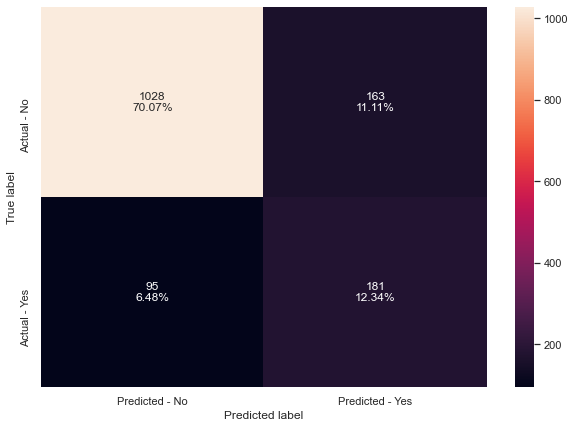

In [64]:
# Getting the metric scores
get_metrics_score(model_tree_postpruned)
# Getting the confusion matrix
make_confusion_matrix(model_tree_postpruned,y_test)  

**Observations**
* model_tree_postpruned is overfitting the training data. There is big differnce between Train and Test scores for all the metrics.
* Among all decision tree models, model_tree_postpruned is the best model since it's the only one that generalized well and didn't overfit the training data. 

### Bagging Classifier

Accuracy on training set :  0.9918152586962876
Accuracy on test set :  0.89093387866394
Recall on training set :  0.9580745341614907
Recall on test set :  0.532608695652174
Precision on training set :  0.9983818770226537
Precision on test set :  0.8258426966292135
F1-Score on training set :  0.9778129952456419
F1-Score on test set :  0.6475770925110133


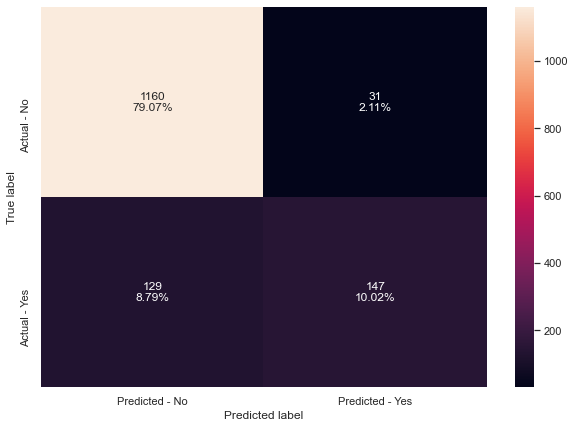

In [65]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

**Observations**
* The model is overfitting the training data. There is a notable difference between Train and Test for all the metrics.
* Let's try to improve the model by tuning hyperparameters using the Grid Search technique to get the optimum values.

In [66]:
# Grid of parameters to choose from
parameters = {'base_estimator':[DecisionTreeClassifier(random_state=1,class_weight = {0: 0.19, 1: 0.81},max_depth=4)],
#               'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : np.arange(10,110,10),
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(BaggingClassifier(random_state=1), parameters, scoring=scorer,cv=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        max_depth=4,
                                                        random_state=1),
                  max_features=0.9, n_estimators=90, random_state=1)

#### Model Evaluation

Accuracy on training set :  0.8275358082432037
Accuracy on test set :  0.8343558282208589
Recall on training set :  0.6381987577639752
Recall on test set :  0.6413043478260869
Precision on training set :  0.53515625
Precision on test set :  0.5514018691588785
F1-Score on training set :  0.5821529745042493
F1-Score on test set :  0.5929648241206029


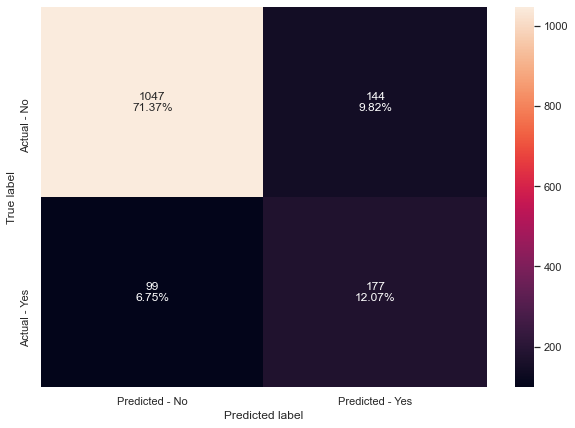

In [67]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

**Observations**
* The model generalized well, where all the metrics scores are close and comparable between train and test data sets. Therefore we will choose the tuned  bagging classifier model over the untuned one..

### Random Forest Classifier

In [68]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Model Evaluation

Accuracy on training set :  1.0
Accuracy on test set :  0.8888888888888888
Recall on training set :  1.0
Recall on test set :  0.4782608695652174
Precision on training set :  1.0
Precision on test set :  0.8741721854304636
F1-Score on training set :  1.0
F1-Score on test set :  0.6182669789227166


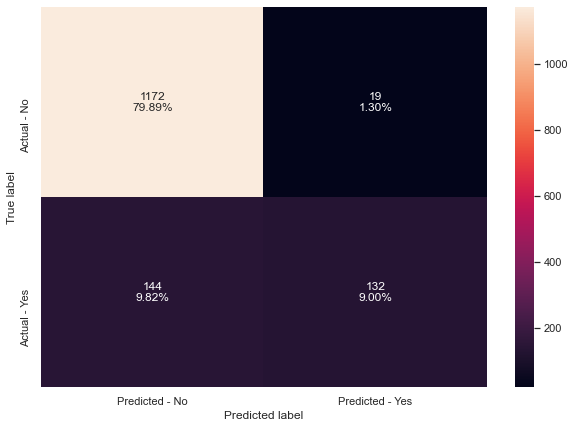

In [69]:
#Calculating different metrics
get_metrics_score(rf)

#Creating confusion matrix
make_confusion_matrix(rf,y_test)

**Observations**
* The random forest model is overfitting the training data. There is a notable difference between Train and Test for all the metrics.
* Let's try to improve the model by assigning a class_weight of {0:0.19,1:0.81} since there is an unbalance between the classes 18.82% for class 1 and 81.18% for class 0.

In [70]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

#### Model Evaluation

Accuracy on training set :  1.0
Accuracy on test set :  0.8834355828220859
Recall on training set :  1.0
Recall on test set :  0.427536231884058
Precision on training set :  1.0
Precision on test set :  0.9007633587786259
F1-Score on training set :  1.0
F1-Score on test set :  0.5798525798525798


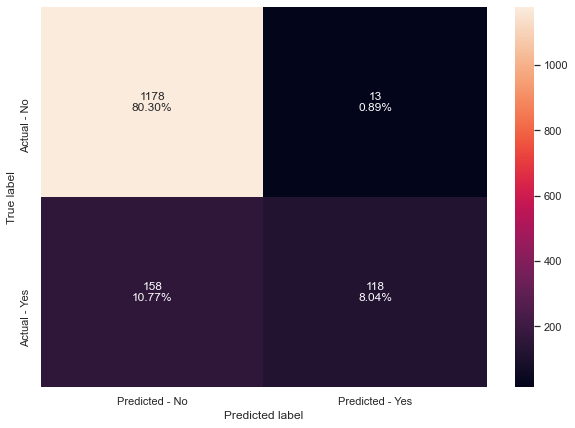

In [71]:
#Calculating different metrics
get_metrics_score(rf_wt)
#Creating confusion matrix
make_confusion_matrix(rf_wt,y_test)

**Observations**
* The model is still overfitting the training data as there is a notable difference between Train and Test for all the metrics.
* Let's try to improve the model by tuning the hyperparameters using the Grid Search technique to get the optimum values.

In [72]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': [5,6,7] ,
                'criterion': ['gini','entropy'],
#                 'max_features': ['sqrt','log2'],
#                 'min_samples_leaf': np.arange(15,20,5),
#                 'min_samples_split': np.arange(30, 35, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=10,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=7, oob_score=True, random_state=1)

#### Model Evaluation

Accuracy on training set :  0.8558900906167787
Accuracy on test set :  0.8432174505794138
Recall on training set :  0.7437888198757764
Recall on test set :  0.6811594202898551
Precision on training set :  0.5935563816604709
Precision on test set :  0.5696969696969697
F1-Score on training set :  0.6602343211578222
F1-Score on test set :  0.6204620462046205


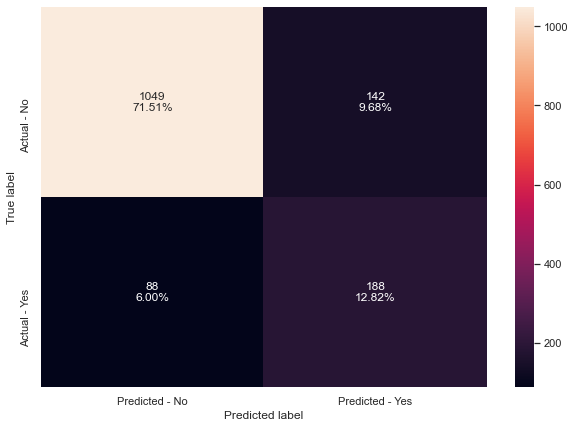

In [72]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

**Observations**
* The model generalized well, where all the metrics scores are close and comparable between train and test data sets.
* The f1-score also did improve.Therefore we will choose the tuned model from the three Random Forest models.

### AdaBoost Classifier

Accuracy on training set :  0.8415667933352821
Accuracy on test set :  0.8445807770961146
Recall on training set :  0.2422360248447205
Recall on test set :  0.2753623188405797
Precision on training set :  0.7428571428571429
Precision on test set :  0.7307692307692307
F1-Score on training set :  0.36533957845433257
F1-Score on test set :  0.39999999999999997


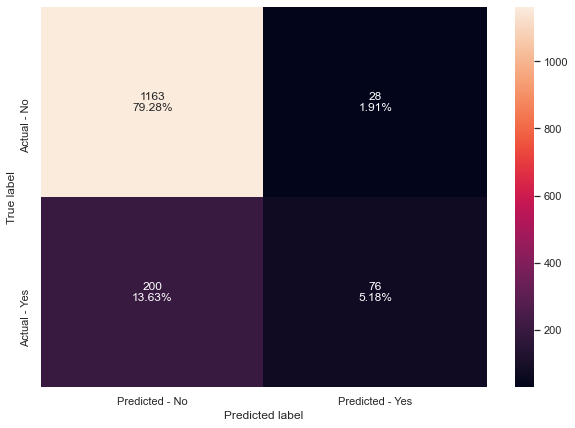

In [73]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

**Observations**
* The model generalized well, where all the metrics scores are very close and comparable between train and test data sets, however the f1-score is very low.
* Let's try to improve the model performance by tuning the hyperparameters using the Grid Search technique to get the optimum values.

In [74]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=2,class_weight={0: 0.19, 1: 0.81},random_state=1)],
    "n_estimators": [100,200,300],
    "learning_rate":[0.01,0.015,0.017]
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5,n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                       1: 0.81},
                                                         max_depth=2,
                                                         random_state=1),
                   learning_rate=0.017, n_estimators=300, random_state=1)

#### Model Evaluation

Accuracy on training set :  0.7912890967553347
Accuracy on test set :  0.8029993183367417
Recall on training set :  0.687888198757764
Recall on test set :  0.7028985507246377
Precision on training set :  0.46338912133891214
Precision on test set :  0.4837905236907731
F1-Score on training set :  0.55375
F1-Score on test set :  0.5731166912850812


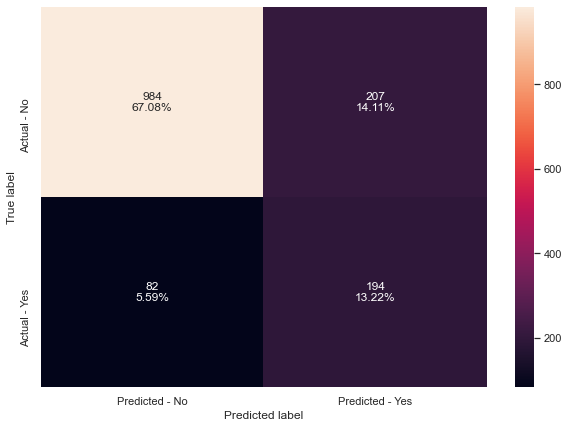

In [75]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

 **Observations**
* The tuned model generalized well, where all the metrics scores are very close and comparable between train and test data sets.
* The f1-score did improve by about 18%. Therefore we will prefer the tuned AdaBoost model over the untuned one .

### Gradient Boosting Classifier

Accuracy on training set :  0.869921075708857
Accuracy on test set :  0.8616223585548739
Recall on training set :  0.38354037267080743
Recall on test set :  0.358695652173913
Precision on training set :  0.8372881355932204
Precision on test set :  0.792
F1-Score on training set :  0.5260915867944621
F1-Score on test set :  0.4937655860349127


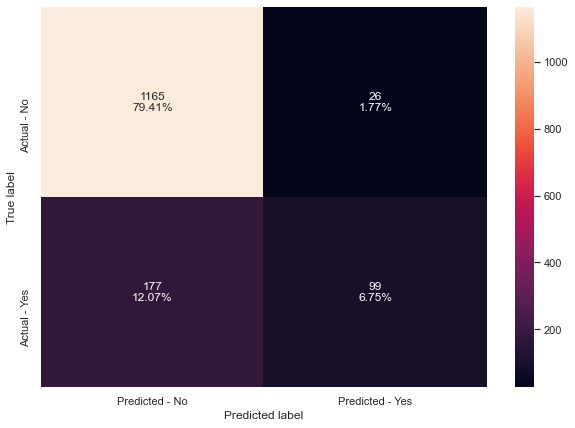

In [76]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

**Observations**
* The model generalized well, where all the metrics scores are very close and comparable between train and test data sets, however the f1-score is low.
* Let's try to improve the model performance by using rf_tuned as an estimator object that is used to compute the initial predictions, and by tuning the hyperparameters using the Grid Search technique to get the optimum values.

In [77]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init= rf_tuned,random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [50,100,150],
    "subsample":[0.6,0.7],
    "learning_rate":[0.07,0.05,0.01],
    "max_features":[0.8,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5,n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       criterion='entropy',
                                                       max_depth=7,
                                                       oob_score=True,
                                                       random_state=1),
                           learning_rate=0.01, max_features=0.8,
                           n_estimators=50, random_state=1, subsample=0.6)

#### Model Evaluation

Accuracy on training set :  0.8760596316866414
Accuracy on test set :  0.8677573278800272
Recall on training set :  0.5854037267080745
Recall on test set :  0.5144927536231884
Precision on training set :  0.7059925093632958
Precision on test set :  0.7029702970297029
F1-Score on training set :  0.6400679117147708
F1-Score on test set :  0.5941422594142259


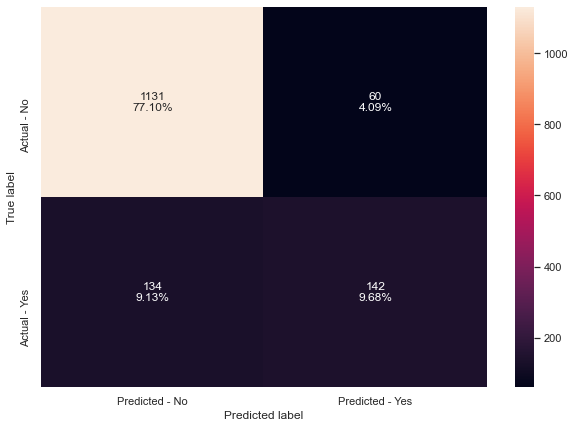

In [78]:
#Calculating different metrics
get_metrics_score(gbc_tuned)
#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

**Observations**
* The f1-score did improve by 10% and there is still a good generalization of the tuned model. Therefore we will prefer the tuned Gradient boosting classifier over the untuned one.

### XGBoost Classifier

Accuracy on training set :  0.9956153171587255
Accuracy on test set :  0.8997955010224948
Recall on training set :  0.9767080745341615
Recall on test set :  0.5543478260869565
Precision on training set :  1.0
Precision on test set :  0.864406779661017
F1-Score on training set :  0.988216810683425
F1-Score on test set :  0.675496688741722


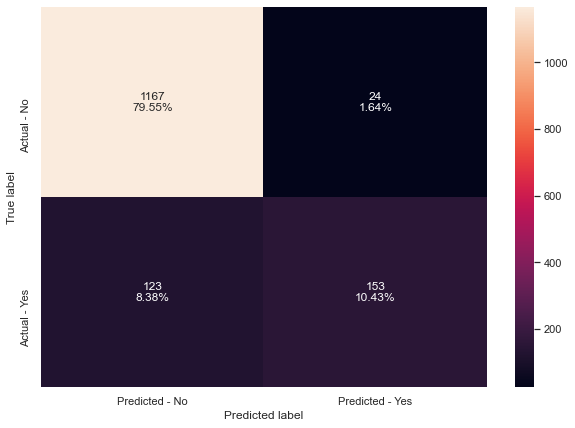

In [79]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

**Observations**
* The model is overfitting the training data. There is a notable difference between Train and Test for all the metrics.
* Let's try to improve the model by tuning the hyperparameters using the Grid Search technique to get the optimum values.

In [80]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,120,150,170],
    "scale_pos_weight":[3,4],
    "subsample":[0.5],
    "learning_rate":[0.2,0.3],
    "colsample_bytree":[0.5],
    "colsample_bylevel":[0.8],
    "max_depth":[2],
    "gamma":[4]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=4, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=3, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

#### Model Evaluation

Accuracy on training set :  0.8284127448114587
Accuracy on test set :  0.8370824812542604
Recall on training set :  0.6366459627329193
Recall on test set :  0.6376811594202898
Precision on training set :  0.5373525557011796
Precision on test set :  0.5587301587301587
F1-Score on training set :  0.5828002842928216
F1-Score on test set :  0.5956006768189509


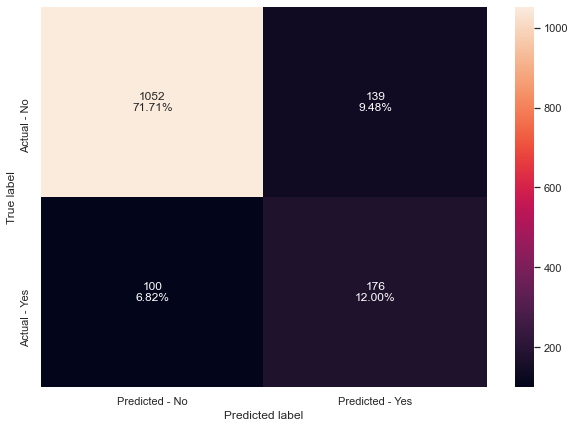

In [81]:
#Calculating different metrics
get_metrics_score(xgb_tuned)
#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

**Observations**
* The model generalized well, where all the metrics scores are very close and comparable between train and test data sets. Therefore we will choose the tuned XGBoost classfier over the untuned one.

### Stacking Classifier
- We will use the best six classifiers(the best of each classifier type):model_tree_prepruned, bagging_estimator_tuned, rf_tuned, abc_tuned,  gbc_tuned, and xgb_tuned to build our stacking classifier model.
- For a given final estimator there are 26 possible combinations out of the the 5 classifiers left as estimators.
- We will create a function get_combinations() to generate all the possible combinations.
- We will use a grid search where the parameters is the estimators fed with the result of get_combinations() to find the best stacking classifier.
- I tried to use final_estimator as a second parameter in the grid search, however this took about 180 minutes in order to compile, I found that if I fix the final estimator and use just estimators as a paramreter for the grid search that results in a much less computational time, an average of 8 minutes for a grid search with a fixed final_estimator. We will use a total of 6 grid searches(one grid search for each final_estimator) therefore the total will be of about 48 minutes.

In [82]:
# Importing the library to generate the combinations.
import itertools
# Function to get all the combinations from a list of classifiers.
def get_combinations(bestmodels):
    # defining empty lists to add the combinations of the best models
    combinations_of_bestmodels=[]
    for sample_size in range(2, len(best_models)+1):
        # best_models is the the list of all classifiers and sample_size is the number of classifiers in each combination.
        for subset in itertools.combinations(best_models, sample_size):
            # transform the tuple to a list and add it to the final list of combinations.
            combinations_of_bestmodels.append(list(subset))
    return combinations_of_bestmodels

#### Trying all possible combinations of estimators for a final_estimator equal to xgb_tuned

In [83]:
# Get all the combinations of estimators
best_models = [('m1',model_tree_prepruned), ('m2',bagging_estimator_tuned), ('m3',rf_tuned),
               ('m4',abc_tuned), ('m5',gbc_tuned)]
combinations_of_bestmodels= get_combinations(best_models)

# Choose the type of classifier. 
stacking_classifier1= StackingClassifier(estimators=combinations_of_bestmodels[0],final_estimator=xgb_tuned)

# Grid of parameters to choose from
parameters = {
    "estimators": combinations_of_bestmodels,
#     "final_estimator":[model_tree_prepruned, bagging_estimator_tuned, rf_tuned,
#                       abc_tuned,  gbc_tuned, xgb_tuned] 
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(stacking_classifier1, parameters,n_jobs=-1,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
stacking_classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data.
stacking_classifier1.fit(X_train, y_train)


StackingClassifier(estimators=[('m1',
                                DecisionTreeClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=3,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=1e-06,
                                                       random_state=1)),
                               ('m2',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                      1: 0.81},
                                                                                        max_depth=4,
                                                                                        random_state=1),
                                       

#### Model Evaluation

Accuracy on training set :  0.8196433791289097
Accuracy on test set :  0.8282208588957055
Recall on training set :  0.6459627329192547
Recall on test set :  0.644927536231884
Precision on training set :  0.5167701863354037
Precision on test set :  0.536144578313253
F1-Score on training set :  0.5741890959282264
F1-Score on test set :  0.5855263157894737


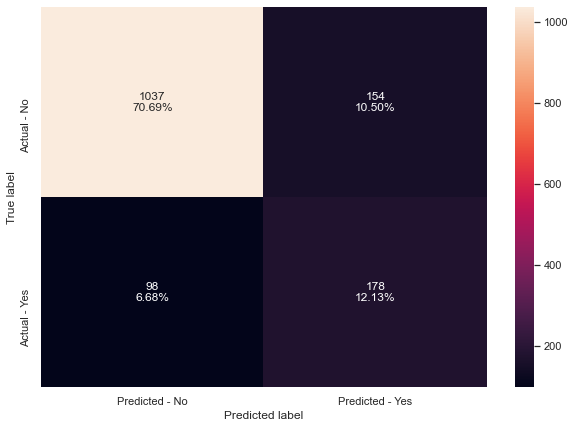

In [84]:

#Calculating different metrics
get_metrics_score(stacking_classifier1)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier1,y_test)

**Observations**
- This model stacking_classifier1 did generalize well where all the metrics are very close and very comparable.
- The model did achieve an accuracy of ~83% and f1-score of ~59%.

#### Trying all possible combinations of estimators for  a final_estimator equal to model_tree_prepruned

In [85]:
# Get all the combinations of estimators
best_models = [('m1',xgb_tuned), ('m2',bagging_estimator_tuned), ('m3',rf_tuned),
               ('m4',abc_tuned), ('m5',gbc_tuned)]
combinations_of_bestmodels= get_combinations(best_models)

# Choose the type of classifier. 
stacking_classifier2= StackingClassifier(estimators=combinations_of_bestmodels[0],final_estimator=model_tree_prepruned)

# Grid of parameters to choose from
parameters = { "estimators": combinations_of_bestmodels }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(stacking_classifier2, parameters,n_jobs=-1,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
stacking_classifier2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
stacking_classifier2.fit(X_train, y_train)


StackingClassifier(estimators=[('m2',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                      1: 0.81},
                                                                                        max_depth=4,
                                                                                        random_state=1),
                                                  max_features=0.9,
                                                  n_estimators=90,
                                                  random_state=1)),
                               ('m4',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                       1: 0.81},
                                                                   

#### Model Evaluation

Accuracy on training set :  0.8047354574685764
Accuracy on test set :  0.7532379004771643
Recall on training set :  0.937888198757764
Recall on test set :  0.8586956521739131
Precision on training set :  0.4902597402597403
Precision on test set :  0.4232142857142857
F1-Score on training set :  0.6439232409381663
F1-Score on test set :  0.5669856459330144


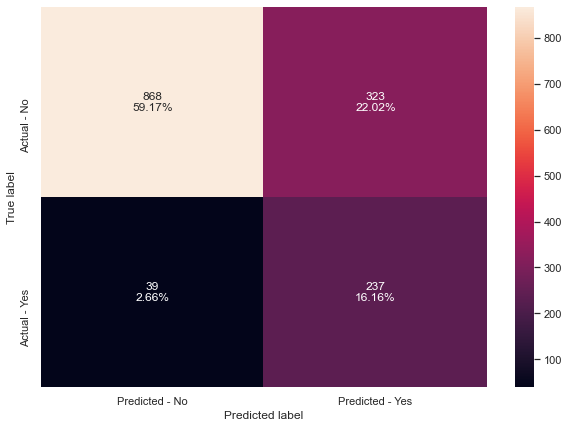

In [86]:
#Calculating different metrics
get_metrics_score(stacking_classifier2)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier2,y_test)

**Observations**
- The model stacking_classifier1 did better than this one:stacking_classifier2 in terms of generalization and  metrics scores.

#### Trying all possible combinations of estimators for a final_estimator equal to bagging_estimator_tuned

In [87]:
# Get all the combinations of estimators
best_models = [('m1',xgb_tuned), ('m2',model_tree_prepruned), ('m3',rf_tuned),
               ('m4',abc_tuned), ('m5',gbc_tuned)]
combinations_of_bestmodels= get_combinations(best_models)

# Choose the type of classifier. 
stacking_classifier3= StackingClassifier(estimators=combinations_of_bestmodels[0],final_estimator=bagging_estimator_tuned)

# Grid of parameters to choose from
parameters = { "estimators": combinations_of_bestmodels }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(stacking_classifier3, parameters,n_jobs=-1,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
stacking_classifier3 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
stacking_classifier3.fit(X_train, y_train)


StackingClassifier(estimators=[('m1',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=0.8,
                                              colsample_bynode=1,
                                              colsample_bytree=0.5,
                                              eval_metric='logloss', gamma=4,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.2,
                                              max_delta_step=0, max_depth=2,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints='()',
                                              n_estimator...
                                GradientBoostingClassifier(init=RandomForestClassifier(clas

#### Model Evaluation

Accuracy on training set :  0.8322128032738966
Accuracy on test set :  0.7920927062031357
Recall on training set :  0.8866459627329193
Recall on test set :  0.8188405797101449
Precision on training set :  0.5326492537313433
Precision on test set :  0.4698544698544699
F1-Score on training set :  0.6655011655011656
F1-Score on test set :  0.5970937912813739


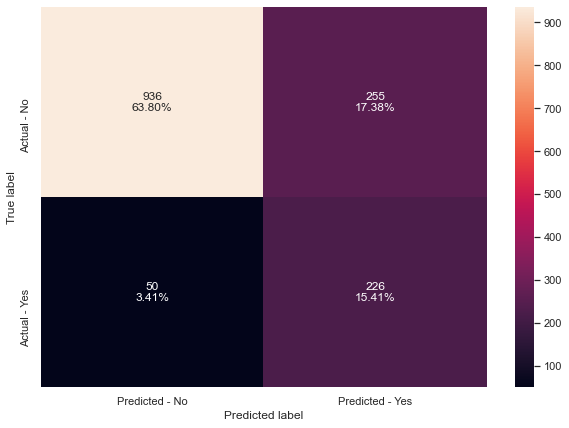

In [88]:
#Calculating different metrics
get_metrics_score(stacking_classifier3)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier3,y_test)

**Observations**
- The model stacking_classifier1 model did better than this one in terms of generalization and  accuracy on the test data. The f1-score of the two models are very close. Therefore, so far stacking_classifier1 is the best among the three stacking classifiers.

#### Trying all possible combinations of estimators for a final_estimator equal to rf_tuned

In [89]:
# Get all the combinations of estimators
best_models = [('m1',xgb_tuned), ('m2',model_tree_prepruned), ('m3',bagging_estimator_tuned),
               ('m4',abc_tuned), ('m5',gbc_tuned)]
combinations_of_bestmodels= get_combinations(best_models)

# Choose the type of classifier. 
stacking_classifier4= StackingClassifier(estimators=combinations_of_bestmodels[0],final_estimator=rf_tuned)

# Grid of parameters to choose from
parameters = { "estimators": combinations_of_bestmodels }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(stacking_classifier4, parameters,n_jobs=-1,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
stacking_classifier4 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
stacking_classifier4.fit(X_train, y_train)


StackingClassifier(estimators=[('m3',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                      1: 0.81},
                                                                                        max_depth=4,
                                                                                        random_state=1),
                                                  max_features=0.9,
                                                  n_estimators=90,
                                                  random_state=1)),
                               ('m4',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                       1: 0.81},
                                                                   

#### Model Evaluation

Accuracy on training set :  0.8479976615024847
Accuracy on test set :  0.8173142467620995
Recall on training set :  0.8183229813664596
Recall on test set :  0.7536231884057971
Precision on training set :  0.5666666666666667
Precision on test set :  0.5098039215686274
F1-Score on training set :  0.6696315120711562
F1-Score on test set :  0.6081871345029239


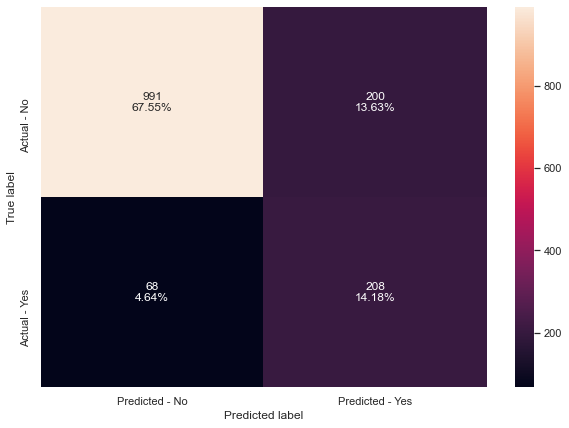

In [90]:
#Calculating different metrics
get_metrics_score(stacking_classifier4)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier4,y_test)

**Observations**
- The Model did have somewhat a good generalization, however stacking_classifier1 model did better than this one in terms of generalization and  accuracy on the test data. The f1-score of the two models are very close. Therefore, so far stacking_classifier1 is the best among the four stacking classifiers.

#### Trying all possible combinations of estimators for a final_estimator equal to abc_tuned

In [91]:
# Get all the combinations of estimators
best_models = [('m1',xgb_tuned), ('m2',model_tree_prepruned), ('m3',rf_tuned),
               ('m4',bagging_estimator_tuned), ('m5',gbc_tuned)]
combinations_of_bestmodels= get_combinations(best_models)

# Choose the type of classifier. 
stacking_classifier5= StackingClassifier(estimators=combinations_of_bestmodels[0],final_estimator=abc_tuned)

# Grid of parameters to choose from
parameters = { "estimators": combinations_of_bestmodels }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(stacking_classifier5, parameters,n_jobs=-1,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
stacking_classifier5 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
stacking_classifier5.fit(X_train, y_train)


StackingClassifier(estimators=[('m1',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=0.8,
                                              colsample_bynode=1,
                                              colsample_bytree=0.5,
                                              eval_metric='logloss', gamma=4,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.2,
                                              max_delta_step=0, max_depth=2,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints='()',
                                              n_estimator...
                                GradientBoostingClassifier(init=RandomForestClassifier(clas

#### Model Evaluation

Accuracy on training set :  0.8184741303712365
Accuracy on test set :  0.7784594410361282
Recall on training set :  0.8944099378881988
Recall on test set :  0.8297101449275363
Precision on training set :  0.5101860053144376
Precision on test set :  0.4516765285996055
F1-Score on training set :  0.649746192893401
F1-Score on test set :  0.5849297573435505


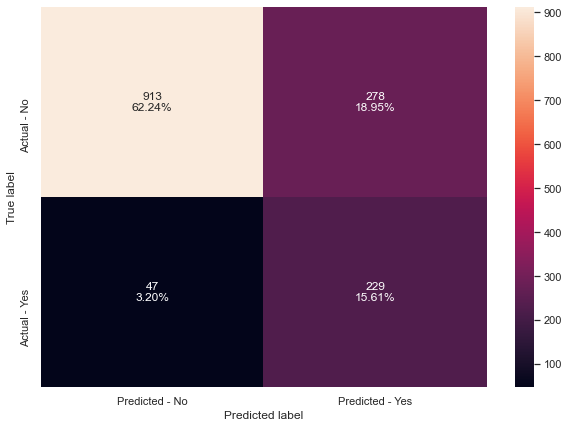

In [92]:
#Calculating different metrics
get_metrics_score(stacking_classifier5)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier5,y_test)

**Observations**
- The model stacking_classifier1 did better than this one in terms of generalization and on all the metrics scores. Therefore, so far stacking_classifier1 is the best among the five stacking classifiers.

#### Trying all possible combinations of estimators for a final_estimator equal to gbc_tuned

In [93]:
# Get all the combinations of estimators
best_models = [('m1',xgb_tuned), ('m2',model_tree_prepruned), ('m3',rf_tuned),
               ('m4',abc_tuned), ('m5',bagging_estimator_tuned)]
combinations_of_bestmodels= get_combinations(best_models)

# Choose the type of classifier. 
stacking_classifier6= StackingClassifier(estimators=combinations_of_bestmodels[0],final_estimator=gbc_tuned)

# Grid of parameters to choose from
parameters = { "estimators": combinations_of_bestmodels }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(stacking_classifier6, parameters,n_jobs=-1,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
stacking_classifier6 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
stacking_classifier6.fit(X_train, y_train)


StackingClassifier(estimators=[('m2',
                                DecisionTreeClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=3,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=1e-06,
                                                       random_state=1)),
                               ('m3',
                                RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       criterion='entropy',
                                                       max_depth=7,
                                                       oob_score=True,
                                                       random_state=1)),
                       

#### Model Evaluation

Accuracy on training set :  0.8485822858813212
Accuracy on test set :  0.8479890933878664
Recall on training set :  0.656832298136646
Recall on test set :  0.6123188405797102
Precision on training set :  0.5875
Precision on test set :  0.5929824561403508
F1-Score on training set :  0.6202346041055719
F1-Score on test set :  0.6024955436720143


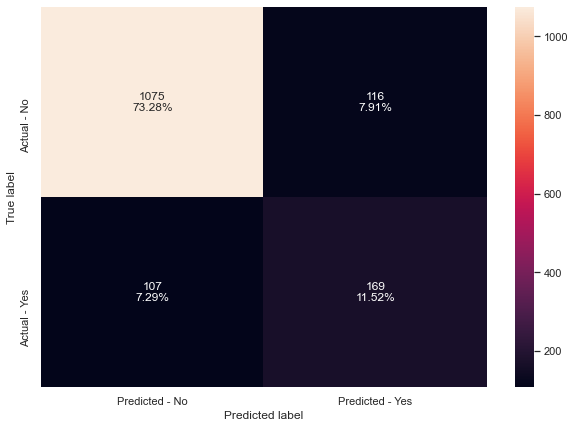

In [94]:
#Calculating different metrics
get_metrics_score(stacking_classifier6)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier6,y_test)

#### Observations
- This stacking_classifier6 model  with estimators: model_tree_prepruned,rf_tuned and abc_tuned and a final_estimator of gbc_tuned had the best performance with the highest f1-score. Also stacking_classifier6 generalized where all metrics socres were very close and very comparable between train and test data. Therefore we will choose this model:stacking_classifier6 That did achieve an accuracy of ~85% and f1-score of ~60% on test set over the other five stacking classifier models

## Comparing the best models

In [95]:
# defining list of the best model of each classifier type.
models = [model_tree_prepruned, bagging_estimator_tuned, rf_tuned,
           abc_tuned,  gbc_tuned, xgb_tuned, stacking_classifier6]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall, Precision and F1-score
for model in models:
    
    scores = get_metrics_score(model,False)
    acc_train.append(scores[0])
    acc_test.append(scores[1])
    recall_train.append(scores[2])
    recall_test.append(scores[3])
    precision_train.append(scores[4])
    precision_test.append(scores[5])
    f1_train.append(scores[6])
    f1_test.append(scores[7])

In [96]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree Prepruned','Tuned Bagging Classifier','Tuned Random Forest','Tuned AdaBoost Classifier',
                                          'Tuned Gradient Boosting Classifier', 'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test f1-score
comparison_frame.sort_values(by='Test_F1-Score',ascending=False, ignore_index=True)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
0,Tuned Random Forest,0.855890,0.843217,0.743789,0.681159,0.593556,0.569697,0.660234,0.620462
1,Stacking Classifier,0.848582,0.847989,0.656832,0.612319,0.587500,0.592982,0.620235,0.602496
2,Tuned XGBoost Classifier,0.828413,0.837082,0.636646,0.637681,0.537353,0.558730,0.582800,0.595601
3,Tuned Gradient Boosting Classifier,0.876060,0.867757,0.585404,0.514493,0.705993,0.702970,0.640068,0.594142
4,Tuned Bagging Classifier,0.827536,0.834356,0.638199,0.641304,0.535156,0.551402,0.582153,0.592965
5,Tuned AdaBoost Classifier,0.791289,0.802999,0.687888,0.702899,0.463389,0.483791,0.553750,0.573117
6,Decision Tree Prepruned,0.798305,0.814588,0.515528,0.492754,0.467606,0.507463,0.490399,0.500000


**Observations**
* All  models generalized well on the different metrics scores.
* The tuned random forest has given the highest test f1-score,then the Stacking classifier comes second, then Tuned XGBoost Classifier comes third.
* The tuned random forest did achieve an accuracy of 84.32% and f1-score of 62.04% on the test set.

**'Visit with us' company Marketing Team should use the tuned Random Forest in predicting if a customer will purchase the new package or not, if they do they should be pitched with 'Wellness Tourism' package**

### Feature importance of Tuned Random Forest

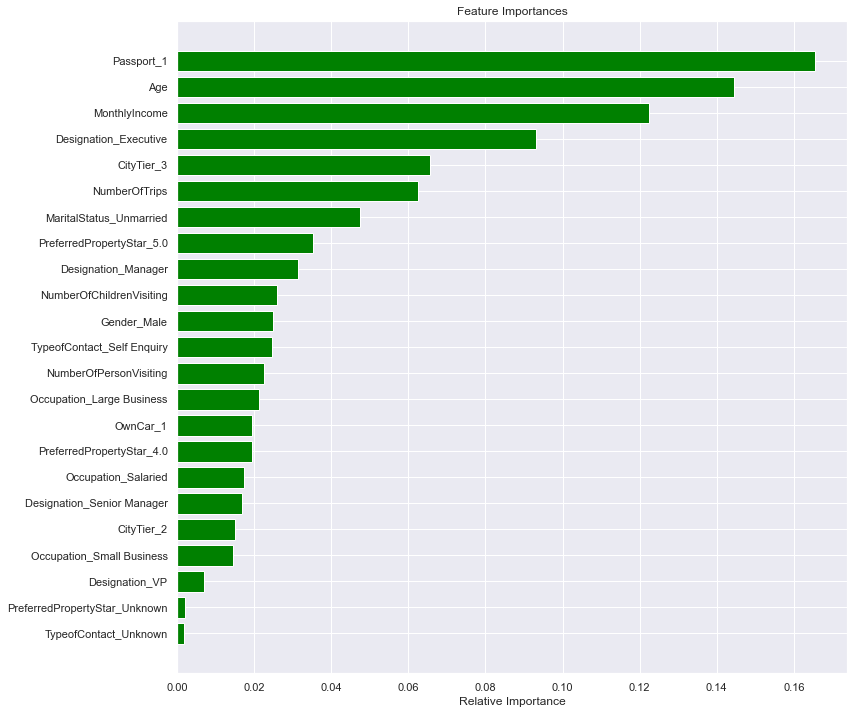

In [97]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**
- According to Random Forest and on the basis of our analysis, the most important features that will predict if a customer is more likely to purchase a package in descending order:
    - Having a passport.
    - Customers with younger Age.
    - Customers with monthly income that ranges from ~18k to ~32K.
    - Customers that have Designation as executives.
    - Customers that live a city tier of 3.
    - Customers with lower NumberOfTrips.
    - Unmarried customers
    - Customers that prefer a 5 star hotels.

## Conclusion And Insights:

- Beside the recommendations given to the marketing team in the **Conclusion and Insights** section of the EDA to help in targeting the correct segement of customers that will purchase a package and therefore help in growing the business. we also recommend the following: 

  - The company should offer incentives to attract customers  that have a higher likelihood of  purchasing  a package, these customers have the following characteristics: 
    - Have a passport.
    - Are young. 
    - Have a monthly income between ~18k and ~32K. 
    - Live in a city tier of 3, this can be explained that customers with a such profile usually have a more stressful live, hence having a vacation can alleviate this stress.
    - Are executives in their current organization.
    - They don't have a large number of trips per year.
    - Are unmarried and prefer a 5 star hotels.
    

### Exploratory Data Analysis on the incorrectly predicted data

In [98]:
# Making a Copy of dfLoanModel
dfTourismWrongPredict = dfTourism.copy()
# Adding a new column 'predicted_Personal_Loan' to the dataframe and conveting it to a category type
dfTourismWrongPredict['predicted_ProdTaken'] =rf_tuned.predict(X)
dfTourismWrongPredict['predicted_ProdTaken']=dfTourismWrongPredict['predicted_ProdTaken'].astype('category')
# Filtering the dataframe to include only the missclassified 
dfTourismWrongPredict= dfTourismWrongPredict.loc[dfTourismWrongPredict.ProdTaken != dfTourismWrongPredict.predicted_ProdTaken]
# Quick Analysis for the missclassified data
dfTourismWrongPredict.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,723.000000,2.000000,0.000000,470.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,723.000000,NaN,NaN,NaN,35.051176,8.974966,18.000000,29.000000,35.000000,40.000000,60.000000
TypeofContact,723,3,Self Enquiry,531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,723.000000,3.000000,1.000000,472.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,723,3,Small Business,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,723,2,Male,467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,723.000000,NaN,NaN,NaN,2.878285,0.687531,1.000000,2.000000,3.000000,3.000000,4.000000
PreferredPropertyStar,723,4,3.0,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,723,2,Unmarried,453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfTrips,723.000000,NaN,NaN,NaN,2.904564,1.539154,1.000000,2.000000,2.000000,3.000000,7.000000


** Observations**
- 75% of the missclassified customers are 40 years older or younger.
- 65% of the missclassified customers were False Positives.
- ~73% of the missclassified customers were pitched a package after a self enquiry.
- ~65% of the missclassified customers live in city tier of 1 and are males.
- ~63% of the the missclassified customers were unmarried, and ~62% are executives.
- ~60% of the missclassified customers own a car.
- The distribution of the the missclassified customers is almost even between customers that have passports and customers without a passport.
- The range of the monthly income of the the missclassified customers  is between 16051 and ~32834.

#### Distribution of CityTier and MaritalStatus vs Passport and OwnCar

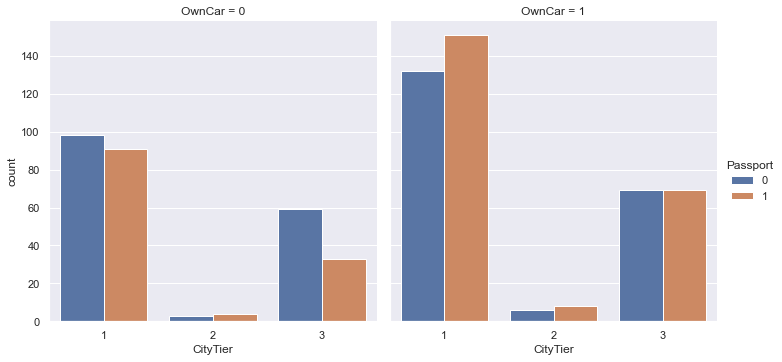

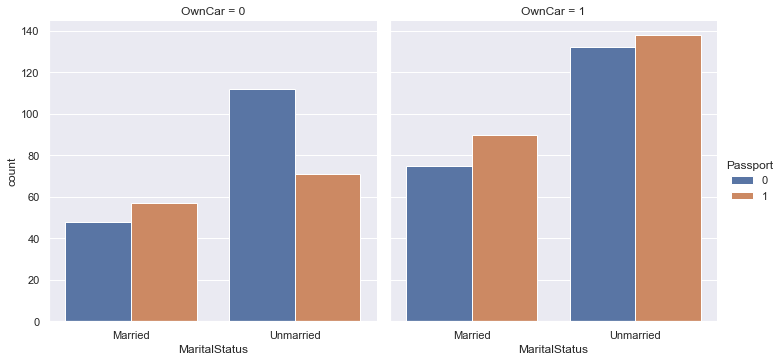

In [99]:
sns.catplot(x='CityTier', hue='Passport', col='OwnCar', data=dfTourismWrongPredict, kind='count' );
sns.catplot(x='MaritalStatus', hue='Passport', col='OwnCar', data=dfTourismWrongPredict, kind='count' );

**Observations**
- If the missclassified customers own a car then the majority are unmarried and have passports, but if they don't own a car then the majority are married and don't have passports.
- The majority of the missclassified customers live in  city tier of 1, then a city tier of 3, very few live in  a city tier of 2.

#### Occupation vs MonthlyIncome vs NumberOfTrips

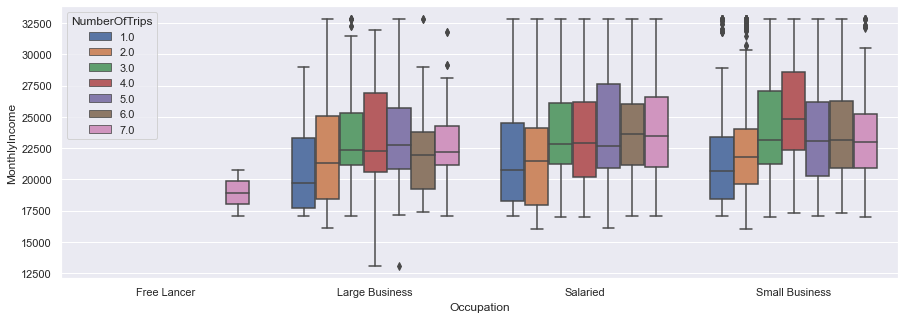

In [100]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15,5))
sns.boxplot(x='Occupation',y="MonthlyIncome",data=dfTourism,hue= 'NumberOfTrips');

**Observations**
- All the missclassified customers make less than ~32500 a month.
- We notice that the distribution is about the same for all categories of occupation except the Free Lancer since we have just two customers that fell under this category. 

#### Age vs PreferredPropertyStar vs NumberOfChildrenVisiting

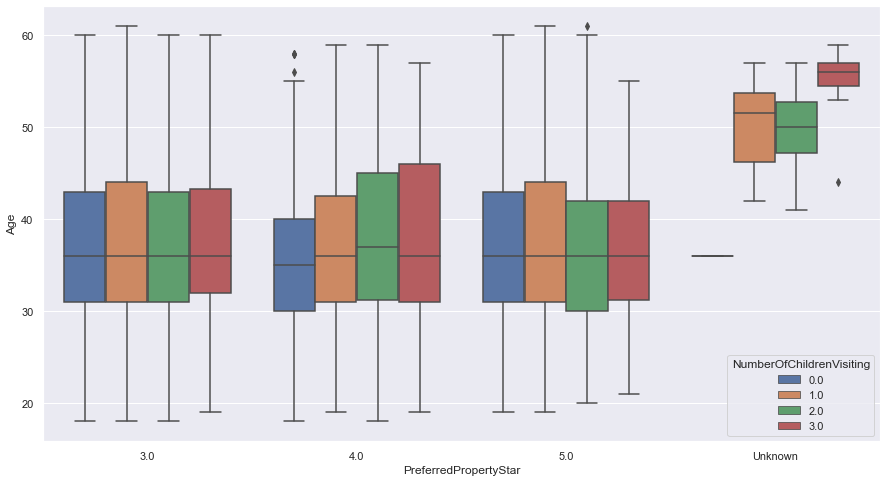

In [101]:
plt.figure(figsize=(15,8))
sns.boxplot(x='PreferredPropertyStar',y="Age",data=dfTourism,hue= 'NumberOfChildrenVisiting');

**Observations**
- We notice that the age distribution is about the same for all PreferredPropertyStar and NumberOfChildrenVisiting categories.

#### Designation vs Gender vs TypeofContact

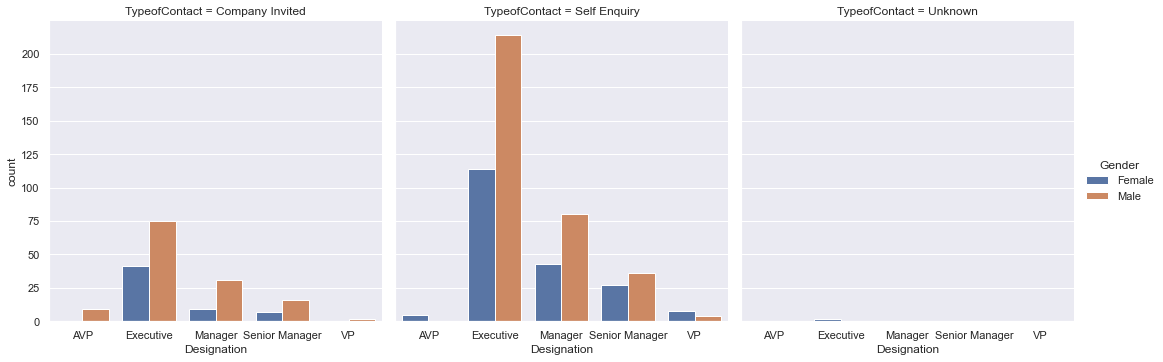

In [102]:
sns.catplot(x='Designation', hue='Gender', col='TypeofContact', data=dfTourismWrongPredict, kind='count' );

**Observations**
- For all categories of Designation and TypeOfContact the majority of missclassified customers were males.

### Exploratory Data Analysis Conclusion
- 65% of the missclassified customers  were predicted to purchase a package when they didn't.
- The majority of missclassified customers were males and executives.
- About 73% of the missclassified customers were pitched a package after a self enquiry.
- Three fourth of the missclassified customers were 40 years old or younger.
- If the missclassified customers own a car then the majority are unmarried and have passports, but if they don't own a car then the majority are married and don't have passports.
- The majority of missclassified customers own a car and live in city tier of 1.